<h2><center>Author: Ricardo Manzano Sanchez.</center></h2>
<h2><center>Email: ricardoamsrams@gmail.com</center></h2>

The followining report is composed of 2 parts.

In the first part, it is analyzed different algorithms to predict the outcome to answer the question if a person will suscribe a term deposit using the dataset of a Bank. This dataset is composed of 20 features and the label. At the beginning, the is applied data cleaning, and it is analized differente algorithms such as decision trees, random forest, and neural networks.

In the second part, it is analyzed the dataset DNA sequences. In this case, the goal is to predict the class of a sample using 57 features. For this question is used KNN, SVM, neural networks and random forests. Finally, it is compared the performance considering different parameters for each part.


__PART I__


In question 1, it is analyzed different algorithms such as decission trees, random forest and neural networks to predict if a person will suscribe a term deposit using 19 inputs of the Bank Marketing Data Set. The dataset used is bank-additional.csv. This data set has the following attributes

__Bank client data:__
   1. age (numeric)
   2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") #12
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) #3
   4. education:(categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") #4
   5. default: has credit in default? (categorical: 'no','yes','unknown') 
   6. housing: has housing loan? (categorical: 'no','yes','unknown')
   7. loan: has personal loan? (categorical: 'no','yes','unknown')
   
__Related with the last contact of the current campaign:__

   8. contact: contact communication type (categorical:"telephone","cellular") #3
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   11. duration: last contact duration, in seconds (numeric)
  
__Other attributes:__
 
   12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   14. previous: number of contacts performed before this campaign and for this client (numeric)
   15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

__social and economic context attribute__ntext attributes

   16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
   17. cons.price.idx: consumer price index - monthly indicator (numeric) 
   18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
   19. euribor3m: euribor 3 month rate - daily indicator (numeric)
   20. nr.employed: number of employees - quarterly indicator (numeric)

__Output variable (desired target):__
  
   21. y - has the client subscribed a term deposit? (binary: "yes","no")
   
   
It is necessary to highlight that  the attribute 11 __Duration__ has been ommited from the analysis because it has major influence in the output variable according to the data set description.






__1. Load a simple dataset and perform some basic data preprocessing to all out "unknowns", outliers or other invalid data. Explain what preprocessing was performed and why. Also, change categorical data into numerical features using pandas.get dummies.__

In this sub-section, it is considered 3 steps: 

Load data

Filled out unknowns or invalid data 

Transform categorical data to numerical




The following lines of code are used to import the data as a dataframe

In [1]:
import pandas as pd   #import pandas library with the name pd
import matplotlib.pyplot as plt #import matplotlib library with the name plt
import numpy as num     #import the library numpy with the name num
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt   # import matplotlib with the name plt 
import matplotlib                 #import matplotlib
import warnings                        #import warnings
warnings.filterwarnings('ignore')      #hide warnings


In [2]:
path = 'bank-additional.csv'  #path to extract data
z=pd.read_csv(path,delimiter=";")  #varible where the data is stored
print(z)
l=z.copy()   # it copies z to l


      age            job   marital            education  default  housing  \
0      30    blue-collar   married             basic.9y       no      yes   
1      39       services    single          high.school       no       no   
2      25       services   married          high.school       no      yes   
3      38       services   married             basic.9y       no  unknown   
4      47         admin.   married    university.degree       no      yes   
5      32       services    single    university.degree       no       no   
6      32         admin.    single    university.degree       no      yes   
7      41   entrepreneur   married    university.degree  unknown      yes   
8      31       services  divorced  professional.course       no       no   
9      35    blue-collar   married             basic.9y  unknown       no   
10     25       services    single             basic.6y  unknown      yes   
11     36  self-employed    single             basic.4y       no       no   

At the beginning, it has been separated categorical and numerical attributes with the goal to plot histograms to give us an idea of the data for the analysis.
In the next lines of code are separated categorical and numerical data in two vectors to plot histograms.


In [3]:
categorical=num.array([1,2,3,4,5,6,7,8,9,14])        #vector to store the categorical attributes
numerical=num.array([0,10,11,12,13,15,16,17,18,19])  #vector to store the numerical attributes

In [4]:
columnsNamesArr = z.columns.values         #this vector has the names of each attribute
length_categorical=categorical.shape[0]    #it is found the number of the components of the categorical features
length_numerical=numerical.shape[0]        #it is found the number of the components of the numerical features


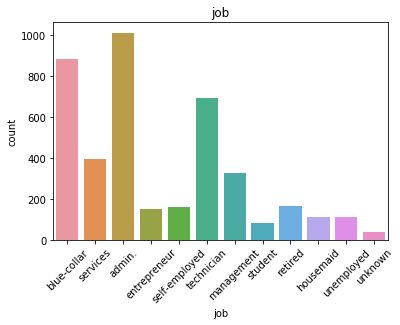

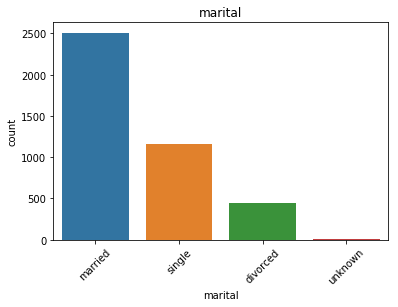

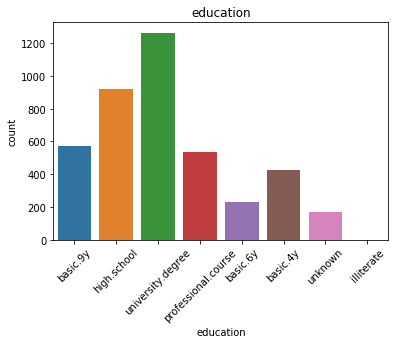

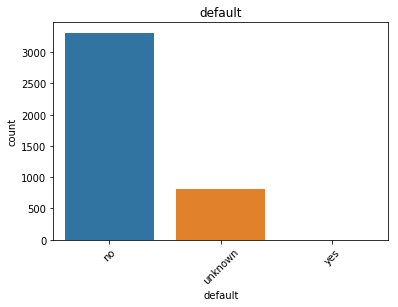

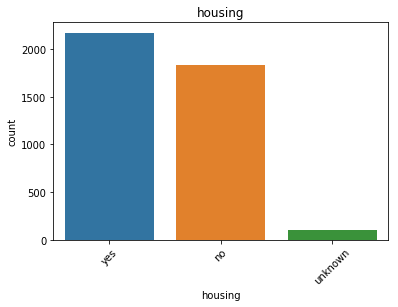

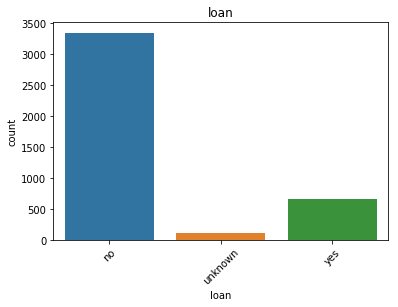

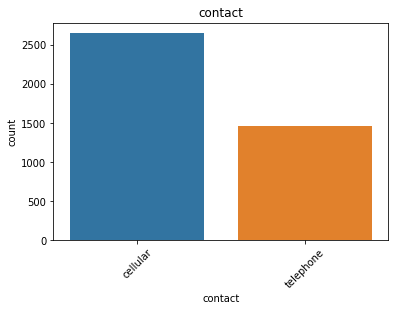

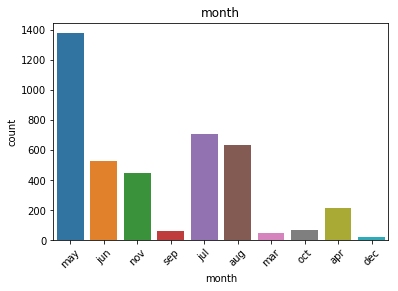

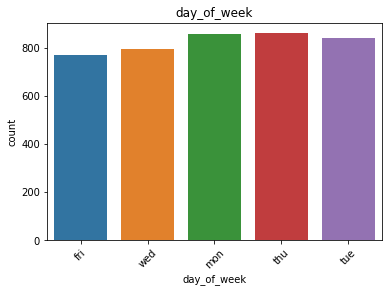

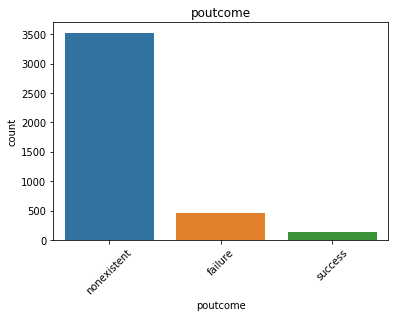

In [5]:
import seaborn as sns                      #library to plot categorical data
for i in range (0,length_categorical):     #for loop to plot all the categorical attributes
#d=c.iloc[:,1]
    plt.figure(i)                          #Create new plot
    m=categorical[i]                       #Extract the number of feature to plot from the vector categorical
    plt.title('%s'%(columnsNamesArr[m]))   #It plots the title
    g=sns.countplot(x=columnsNamesArr[m], data=z)  #Plot function
    plt.xticks(rotation=45)                #it rotates the labels 

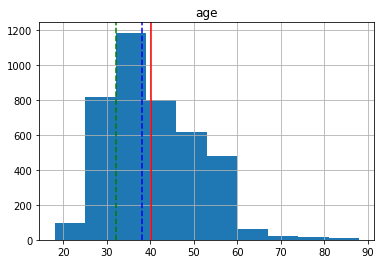

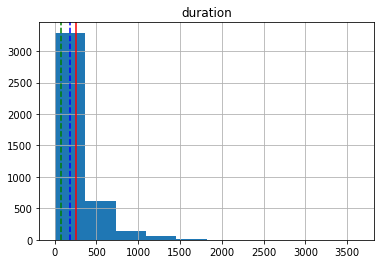

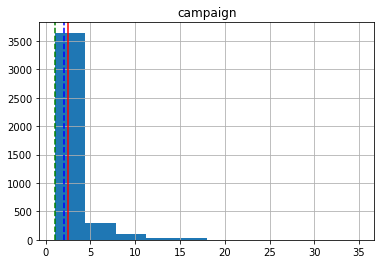

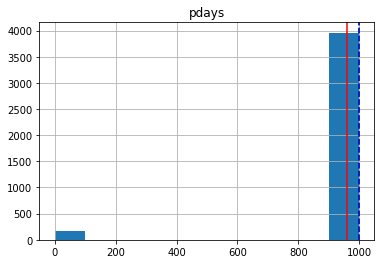

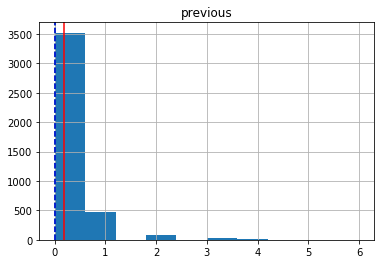

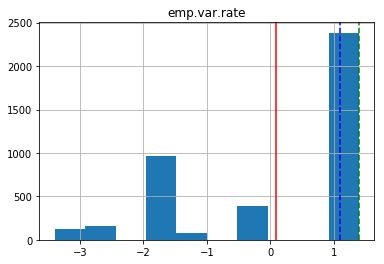

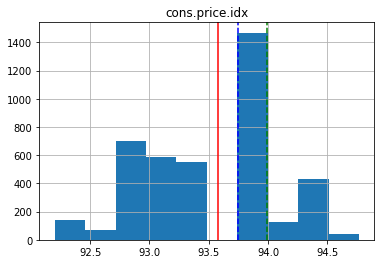

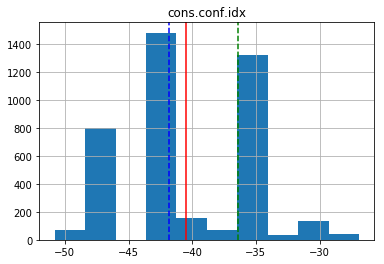

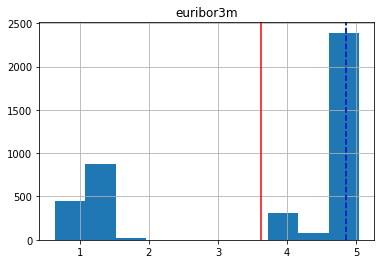

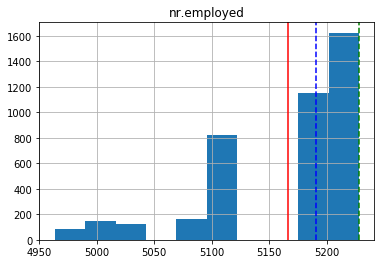

In [6]:
for i in range (0,length_numerical):       #for loop to plot the histograms for numerical data
#d=c.iloc[:,1]
    plt.figure(i)                          #Create new plot
    n=numerical[i]
    am_hist=z.iloc[:,n].hist(bins=10)      # Plot a histogram of each feature
    meanr=z.iloc[:,n].mean()               #Find the mean of each feature
    modar=z.iloc[:,n].mode().get_values()[0] #Find the mode of each feature
    medianr=z.iloc[:,n].median()            #Find the median of each feature
    plt.title('%s'%(columnsNamesArr[n]))            #Title for each histogram
    am_hist.axvline(meanr,color='r',linestyle='-')  #Draw a line in the mean
    am_hist.axvline(modar,color='g',linestyle='--') #Draw a line in the mode
    am_hist.axvline(medianr,color='b',linestyle='--') #Draw a line in the median

After plotting histograms of each attribute, we can conclude that the attribute __PDAYS__ will be eliminated because it has almost all the samples with the value 999 which represents that the client has not been contacted before. In addition, it is eliminated the attributre __Duration__ as the description of the dataset suggest. Finally, the attribute __Poutcome__ has been eliminate because almost all the values have nonexistent on it. These attributes have been eliminated from the analysis because these can bias the final result.

To eliminate these attributes, the next lines of code are used


In [7]:
a=z.iloc[:,num.r_[0:10,11,13,15:20]]  # Code to drop the attribute duration, pdays and poutcome
print(a)
#a.to_csv('h31.csv', sep=',')
#b=z.iloc[:,16]             #assign in b the values of the labels
#print(b)

      age            job   marital            education  default  housing  \
0      30    blue-collar   married             basic.9y       no      yes   
1      39       services    single          high.school       no       no   
2      25       services   married          high.school       no      yes   
3      38       services   married             basic.9y       no  unknown   
4      47         admin.   married    university.degree       no      yes   
5      32       services    single    university.degree       no       no   
6      32         admin.    single    university.degree       no      yes   
7      41   entrepreneur   married    university.degree  unknown      yes   
8      31       services  divorced  professional.course       no       no   
9      35    blue-collar   married             basic.9y  unknown       no   
10     25       services    single             basic.6y  unknown      yes   
11     36  self-employed    single             basic.4y       no       no   

After eliminating features that can bias the model. It is noteworthy that some attributes have some unknown values. To verify how many unknowns have each attribute, the next lines of code verify this issue

In [8]:
c=a.copy()   # it copies a to c
c=c.replace('unknown',num.nan) #unknowns are replaced by NULL
print(c)

      age            job   marital            education default housing loan  \
0      30    blue-collar   married             basic.9y      no     yes   no   
1      39       services    single          high.school      no      no   no   
2      25       services   married          high.school      no     yes   no   
3      38       services   married             basic.9y      no     NaN  NaN   
4      47         admin.   married    university.degree      no     yes   no   
5      32       services    single    university.degree      no      no   no   
6      32         admin.    single    university.degree      no     yes   no   
7      41   entrepreneur   married    university.degree     NaN     yes   no   
8      31       services  divorced  professional.course      no      no   no   
9      35    blue-collar   married             basic.9y     NaN      no   no   
10     25       services    single             basic.6y     NaN     yes   no   
11     36  self-employed    single      

In [9]:
aux=c.isna().sum(axis=0)   #Find the sum of all null values for each attribute
print(aux)


age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
campaign            0
previous            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
dtype: int64


As it is noteworthy, only categorical attributes have unknown attributes. Generally, unknowns in categorical can be replaced by the value with greater frecuency. 
The next lines of code replace Null values or unknows with the value with greater frecuency.

In [10]:
columnsNamesArr1 = c.columns.values        #this vector has the names of each attribute 
from sklearn.impute import SimpleImputer   #library to replace unknows by the most frecuent values in categorical data
imp = SimpleImputer(strategy="most_frequent")  #function to replace unknows by the most frecuent values in categorical data
l=imp.fit_transform(c) 
h=pd.DataFrame.from_records(l,columns=columnsNamesArr1 )  # it is replaced unknows by the most frecuent values in categorical data
print(h)

      age            job   marital            education default housing loan  \
0      30    blue-collar   married             basic.9y      no     yes   no   
1      39       services    single          high.school      no      no   no   
2      25       services   married          high.school      no     yes   no   
3      38       services   married             basic.9y      no     yes   no   
4      47         admin.   married    university.degree      no     yes   no   
5      32       services    single    university.degree      no      no   no   
6      32         admin.    single    university.degree      no     yes   no   
7      41   entrepreneur   married    university.degree      no     yes   no   
8      31       services  divorced  professional.course      no      no   no   
9      35    blue-collar   married             basic.9y      no      no   no   
10     25       services    single             basic.6y      no     yes   no   
11     36  self-employed    single      

To verify, that the attributes do not have NULLS with the following lines are used

In [11]:
aux=h.isna().sum(axis=0)   #Find the sum of all null values for each attribute
print(aux)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


As we can see in the last table, there are not unknown values in the categorical attributes.

After replacing unknown values by the most frequent values, it is plotted again histograms to verify that all the attributes are useful to train classifiers 

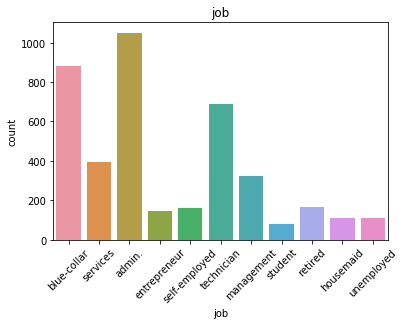

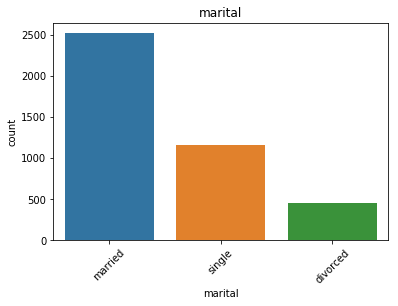

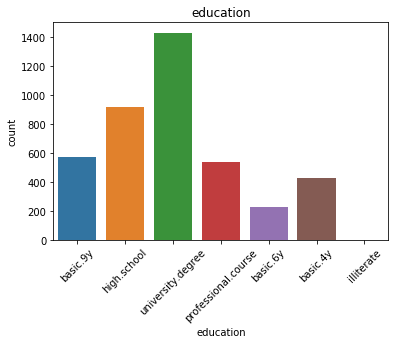

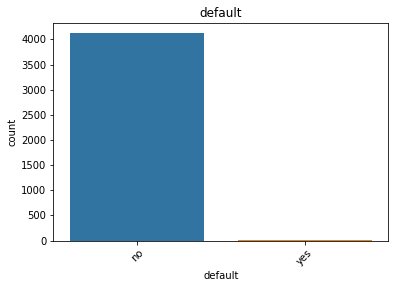

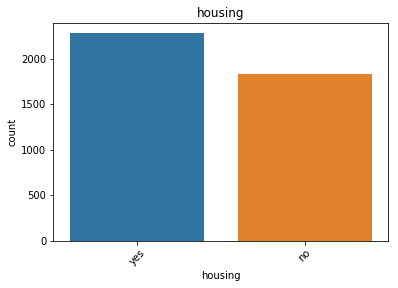

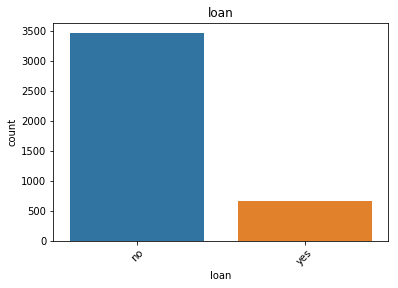

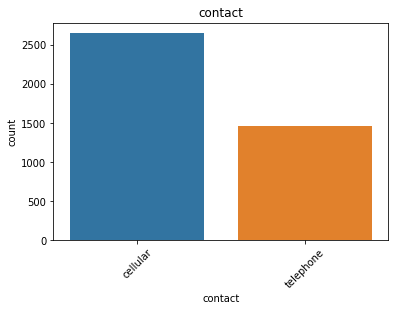

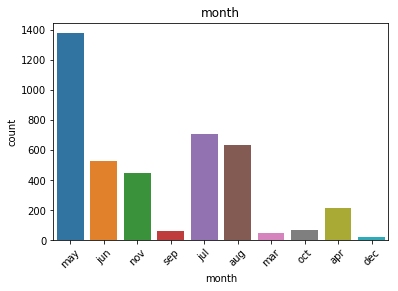

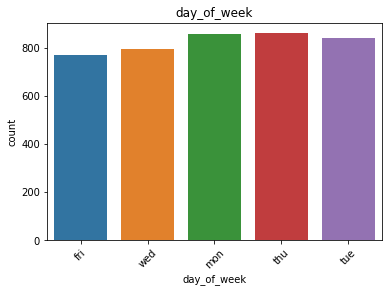

In [12]:
categorical1=num.array([1,2,3,4,5,6,7,8,9])  # vector which contains the categorical data
length_categorical1=categorical1.shape[0]   # it is found the number of attributes in the vector defined before
import seaborn as sns               #library to plot categorical data
for i in range (0,length_categorical1):   #for loop to plot all the categorical attributes
#d=c.iloc[:,1]
    plt.figure(i)                          #Create new plot
    #plt.title('%s'%(columnsNamesArr1[m]))
    m=categorical1[i]                       #Extract the number of feature to plot from the vector categorical
    n=columnsNamesArr1[m]                   #Extract the number of feature to plot from the vector categorical
    plt.title('%s'%(columnsNamesArr1[m]))   #It plots the title
    g=sns.countplot(x=n, data=h)         #Plot function
    plt.xticks(rotation=45)         #it rotates the labels 

We can observe that the attribute __default__ has all the values with __NO__. This attribute is eliminated because does not help to construct the model.

In [13]:
gf=h.iloc[:,num.r_[0:4,5:17]]  # Code to drop the attribute duration, pdays and poutcome
print(gf)

      age            job   marital            education housing loan  \
0      30    blue-collar   married             basic.9y     yes   no   
1      39       services    single          high.school      no   no   
2      25       services   married          high.school     yes   no   
3      38       services   married             basic.9y     yes   no   
4      47         admin.   married    university.degree     yes   no   
5      32       services    single    university.degree      no   no   
6      32         admin.    single    university.degree     yes   no   
7      41   entrepreneur   married    university.degree     yes   no   
8      31       services  divorced  professional.course      no   no   
9      35    blue-collar   married             basic.9y      no   no   
10     25       services    single             basic.6y     yes   no   
11     36  self-employed    single             basic.4y      no   no   
12     36         admin.   married          high.school      no 

After selecting the most important features, it is necessary to identify outliers in numerical data. It has been used Interquartile methodology to do that.


In [14]:
numerical1=num.array([0,9,10,11,12,13,14,15])  #vector to define attributes with numerical data
#print(numerical1)
#print(gf.shape[0] )
#print(gf.iloc[:,15])

In [15]:
number_attributes=numerical1.shape[0]      #It is obtained the number of samples after moving average
from numpy import percentile
number_samples=gf.shape[0]      #It is obtained the number of samples after moving average
for fel in range(0,number_attributes):
    fe=numerical1[fel]
    quartile25, quartile75 = percentile(gf.iloc[:,fe], 25), percentile(gf.iloc[:,fe], 75)  #it is found the 24 quartile and the 75 quartile 
    iqr = quartile75 - quartile25  #it is define the interquartile
    factor = iqr*3   #it is found a factor which is 3 times the interquartile range
    lower_boundary, upper_boundary = quartile25 - factor, quartile75 + factor # it is defined the upper and lower boundary to recognize outliers
    mean_feature=gf.iloc[:,fe].mean()   #It is found the mean of each feature
    for s in range(0,number_samples):
            if (gf.iloc[s,fe]>upper_boundary):  #Conditional to replaced outliers with the mean 
                gf.iloc[s,fe]=mean_feature
            if (gf.iloc[s,fe]<lower_boundary):   #Conditional to replaced outliers with the mean 
                gf.iloc[s,fe]=mean_feature
       

It is plotted the results after interquartile method is applied to numerical data

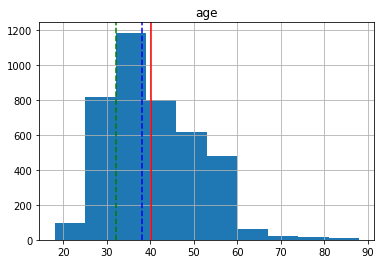

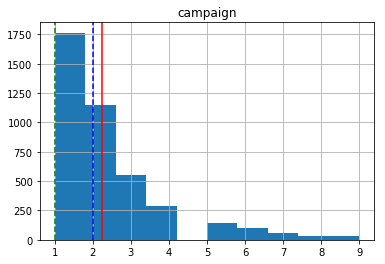

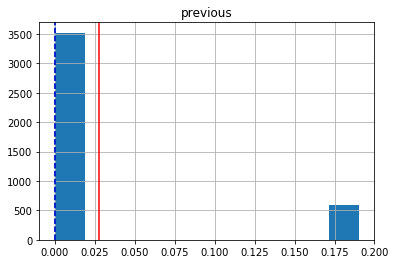

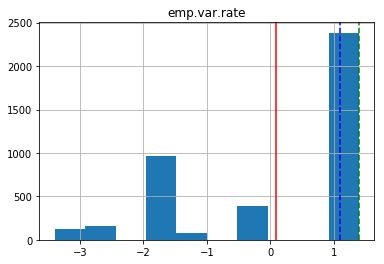

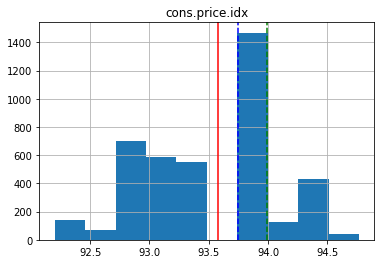

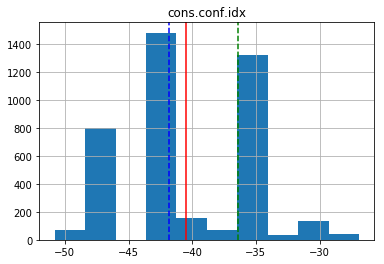

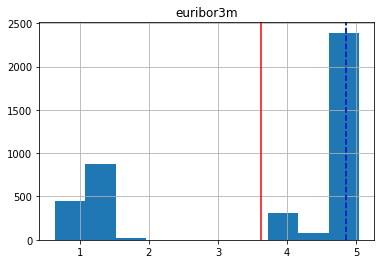

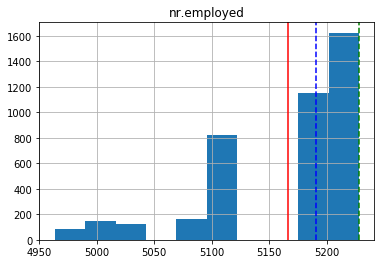

In [16]:
columnsNamesArr2 = gf.columns.values
for i in range (0,number_attributes):
#d=c.iloc[:,1]
    plt.figure(i)                          #Create new plot
    ni=numerical1[i]
    am_hist=gf.iloc[:,ni].hist(bins=10)      # Plot a histogram of each feature
    meanr=gf.iloc[:,ni].mean()               #Find the mean of each feature
    modar=gf.iloc[:,ni].mode().get_values()[0] #Find the mode of each feature
    medianr=gf.iloc[:,ni].median()            #Find the median of each feature
    plt.title('%s'%(columnsNamesArr2[ni]))            #Title for each histogram
    am_hist.axvline(meanr,color='r',linestyle='-')  #Draw a line in the mean
    am_hist.axvline(modar,color='g',linestyle='--') #Draw a line in the mode
    am_hist.axvline(medianr,color='b',linestyle='--') #Draw a line in the median

After executing data cleaning, it is necessary to transform categorical data to numerical data using __One_hot encoding__

In [17]:
di=pd.DataFrame(gf).copy()      #copy the dataframe a into d
ri=pd.get_dummies(data=di,columns=['job', 'marital','education','housing','loan','contact','month','day_of_week']) #Apply one_hot encoding to some attributes
print(ri)
ri.to_csv('as2.csv', sep=',')

      age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0      30  2.000000  0.000000          -1.8          92.893          -46.2   
1      39  4.000000  0.000000           1.1          93.994          -36.4   
2      25  1.000000  0.000000           1.4          94.465          -41.8   
3      38  3.000000  0.000000           1.4          94.465          -41.8   
4      47  1.000000  0.000000          -0.1          93.200          -42.0   
5      32  3.000000  0.190337          -1.1          94.199          -37.5   
6      32  4.000000  0.000000          -1.1          94.199          -37.5   
7      41  2.000000  0.000000          -0.1          93.200          -42.0   
8      31  1.000000  0.190337          -0.1          93.200          -42.0   
9      35  1.000000  0.000000           1.1          93.994          -36.4   
10     25  1.000000  0.000000           1.4          93.918          -42.7   
11     36  1.000000  0.000000           1.4          93.918     

Finally, it is replaced in the label __YES__ by the number 1 and __NO__ by the number 0.

In [18]:
print( z.iloc[:,20])
z.iloc[:,20]=z.iloc[:,20].replace('yes', 1)  #Replace 1 instead of yes
z.iloc[:,20]=z.iloc[:,20].replace('no', 0)   #Replace 0 instead of no
labels=z.iloc[:,20]   # Assigned to the variable labels the values of each label
print(labels)

0        no
1        no
2        no
3        no
4        no
5        no
6        no
7        no
8        no
9        no
10       no
11       no
12       no
13       no
14       no
15       no
16       no
17       no
18       no
19      yes
20       no
21      yes
22       no
23       no
24       no
25      yes
26       no
27       no
28       no
29       no
       ... 
4089    yes
4090     no
4091     no
4092     no
4093     no
4094     no
4095     no
4096     no
4097     no
4098     no
4099     no
4100     no
4101     no
4102     no
4103     no
4104     no
4105     no
4106     no
4107     no
4108     no
4109     no
4110     no
4111     no
4112     no
4113     no
4114     no
4115     no
4116     no
4117     no
4118     no
Name: y, Length: 4119, dtype: object
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      1
20      0
21      1
22      0
2

In [19]:
dataset_pre_processed = pd.concat([ri,labels ], axis=1)



__2. Divide data into train and test portions, justify your split decision.__

To find the best split for the data, it has been used learning curves which indicate what is the best split to obtain an acceptable bias and variance in the model. When it is analyzed learning curves, there are two curves plotted at the same time. The first curve represents the accuracy obtained with the training data while the second curve represents the accuracy reached with the testing data using the same model obtained with the training data.
The accuracy of the training dataset is obtained using cross fold validation, it means that the training data is splitted in k folds. To ilustrate, if the training data is divided in 10 folds, at the beginning the first 9 folds are used to trained a model, and it is tested with the remaining fold to obtain an accuracy for the training dataset. With the same model generated by the 9 folds is validated the testing dataset too. For this reason, for each fold is obtained an accuracy for the training dataset and an accuracy for the testing dataset. This process is repeated 10 times because it is 10 fold cross validation obtaining 10 accuracies for training dataset and 10 for testing dataset. These accuracies are average to obtain two accuracy values. This process is repeated using different quantity of samples for the training set to discover what is the best split.

To apply this methodology, at the beginning, the entire dataset has been shuffled. 

In [20]:
from sklearn.utils import shuffle       #library to shuffle the dataset
dataset_shuffle = shuffle(dataset_pre_processed,random_state=0)   #function to shuffle the dataset
#dataset_shuffle.to_csv('as21sh.csv', sep=',')
features=dataset_shuffle.iloc[:,0:50]  #features of the model
target=dataset_shuffle.iloc[:,50]      #labels of the model

After the data is shuffled, different classifiers are used to generate learning curves. It has been separated the dataset in training 85% and testing 15% to include the greatest range to select the best split. Over 85% there will be overfitting. For this reason, it has not been analyzed until 100%

Training dataset = 85% and Testing dataset=10%

Text(0.5, 1.0, 'Estimator Decision tree')

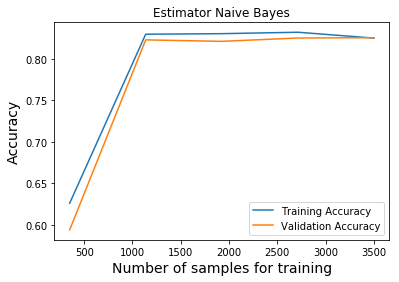

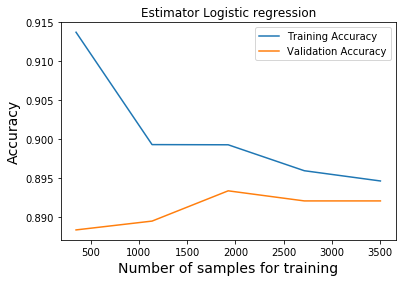

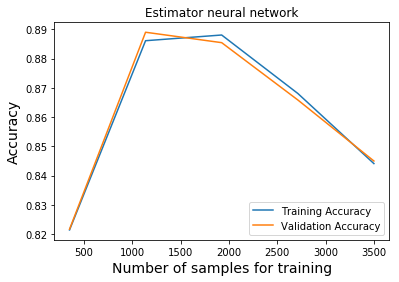

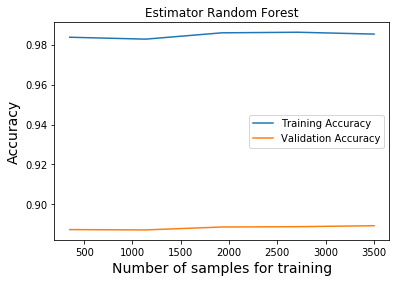

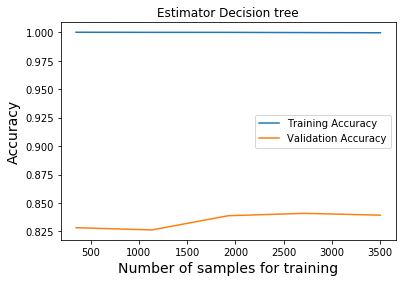

In [21]:
from sklearn.model_selection import learning_curve   #library to use learning curves
from sklearn.model_selection import ShuffleSplit              #library to use the function shufflesplit
cv = ShuffleSplit(n_splits=10, test_size=0.15, random_state=0) #it has been used 10 fold cross validation to generate the accuracy of the models
def plot_learning_curve1(estimator, features, target,cv):   #function to plot learning curves of classifiers
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator , X =features , y=target, cv = cv, scoring = 'accuracy')  #function learning curve applied
    train_scores_mean = train_scores.mean(axis = 1)    #It is obtained the mean accuracy of the training dataset taking into account each fold  
    validation_scores_mean = validation_scores.mean(axis = 1) #It is obtained the mean accuracy of the validation dataset taking into account each fold 
    plt.plot(train_sizes, train_scores_mean, label = 'Training Accuracy')  #it is plotted the training sizes vs training accuracies 
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation Accuracy') #it is plotted the training sizes vs validation accuracies 
    plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
    plt.xlabel('Number of samples for training', fontsize = 14) #function to plot the label in x
    plt.legend() #this functions shows the legends

from sklearn.naive_bayes import GaussianNB  #library to use Naive Bayes classifier
plt.figure(3)
plot_learning_curve1(GaussianNB(),features,target,cv) #it is called the function plot_learning_curve for naive bayes
plt.title('Estimator Naive Bayes')


from sklearn.linear_model import LogisticRegression  #library to use the estimator logistic regression
plt.figure(2)                 #number of figure to plot
plot_learning_curve1(LogisticRegression(random_state=0),features,target,cv)  #it is called the function plot_learning_curve for logistic regression
plt.title('Estimator Logistic regression')

from sklearn.neural_network import MLPClassifier #library to use neural network classifier
plt.figure(6)
plot_learning_curve1(MLPClassifier(random_state=0),features,target,cv) #it is called the function plot_learning_curve for neural network
plt.title('Estimator neural network') 


from sklearn.ensemble import RandomForestClassifier #library to use random forest classifier
plt.figure(4)
plot_learning_curve1(RandomForestClassifier(random_state=0),features,target,cv)  #it is called the function plot_learning_curve for Random Forest
plt.title('Estimator Random Forest')  

from sklearn.tree import DecisionTreeClassifier  #library to use decision tree classifier
plt.figure(5)
plot_learning_curve1(DecisionTreeClassifier(random_state=0),features,target,cv) #it is called the function plot_learning_curve for Decision Trees
plt.title('Estimator Decision tree') 




We can observe that Naive Bayes classifier reaches the maximun accuracy and the minimun variance when the number of samples is 3000. A similar behavior, we can observe in logistic regression, the less variance and the maximun accuracy is reached in 3000 samples. If we see the value of 2000, it is reached a maximun in accuracy, but 2000 samples represent only the 50%. For this reason, it has not been taken this value. The graph for neural neural does not show a similar behavior because neural network can have multiple local minima in each iteration. The random forest and decision tree reaches the maximun accuracy and less variance in 3000 samples too. We can conclude that when the number of samples to train the model is approximately 3000, it is obtained good results in terms of accuracy and variance. For this reason, this value has been selected to split the data in training and testing.

The dataset has 4119 samples. Thus 3000 represents the %73 of the data.

__3. Apply classification using Decision Trees (DT), Random Forests (RF) and Neural Networks (NN) and run using standard libraries in your language or choice. Indicate the classification properties (example: depth of tree, size of neural network, ensembles for RF) you have chosen and justify. Briefly describe the algorithms employed by the libraries you are using (example
ID3, C4.5, C5.0 and CART for DT). Make sure to run the classification on 10 features or more.__



__Decision Trees.__

In the present work, it has been used a sklearn library from Phyton to train and test a decision tree. CART (classification and regression tree) algorithm is used in this case. Cart cannot handle numerical and categorical data in phyton. For this reason, it has been transformed all the attributes to numerical data. Cart uses gini to determine purity of each node. CART does a binary split of the attributes using the GINI coefficient. Generally, if there is not configured a pre-pruning or post-prunning algorithm, it will exist overffiting to construct the model due to the fact that the algorithm by default tries to split the nodes until reach the maximun purity of each class.
To avoid overfitting and select the optimal values of the tree, it has been analyzed how the accuracy changes in the training and testing set depending on the dept of the tree.
As we describe in the last sub-section, we will divide the data in 73% for training and 27% for training.


The dataset has not been normalized before to apply decision trees and random forest because these algorithms are not affected by attributes with different scales. Neural network can manage different scales of the attributes, but the algorithm can take more time to train the neural network.

In [22]:
from sklearn.model_selection import train_test_split   #library tp split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(features,target , test_size = 0.27,random_state=0)   #function to split the data in training and testing

To determine what are the parameters such as the depth of the tree, and number of nodes when the algorithm splits the nodes until to get the maximun purity, the next lines have been used

In [23]:
from sklearn.tree import DecisionTreeClassifier   #decision tree library is imported
from sklearn.metrics import f1_score              #function to calculate f1-score is imported
from sklearn.metrics import accuracy_score        #function to calculate accuracy is imported
model_decision_tree = DecisionTreeClassifier(random_state=0)   #The decision tree function is declared to create the model
model_decision_tree = model_decision_tree.fit(X_train, y_train) #It is built the model with training data
predict_decision_tree_training=model_decision_tree.predict(X_train) #Function to predict the labels for training dataset
predict_decision_tree_testing=model_decision_tree.predict(X_test) #Function to predict the labels for testing dataset

accuracy_decision_tree_training=accuracy_score(y_train, predict_decision_tree_training)#Function to calculate the accuracy using predicted and ground truth
accuracy_decision_tree_testing=accuracy_score(y_test, predict_decision_tree_testing) #Function to calculate the accuracy using predicted and ground truth

f1_score_decision_tree_training=f1_score(y_train, predict_decision_tree_training, average='macro') #Function to calculate the f1-measure using predicted and ground truth
f1_score_decision_tree_testing=f1_score( y_test, predict_decision_tree_testing, average='macro') #Function to calculate the f1-measure using predicted and ground truth

n_nodes = model_decision_tree.tree_.node_count #function to calculate the number of nodes in the decision tree
depth=model_decision_tree.tree_.max_depth #function to calculate the depth of the tree

print('Number of nodes %d'%n_nodes)
print('F1 score for training %.2f'%f1_score_decision_tree_training)
print('Accuracy for training %.2f'%accuracy_decision_tree_training)
print('F1 score for testing %.2f'%f1_score_decision_tree_testing)
print('Accuracy for testing %.2f'%accuracy_decision_tree_testing)
print('Depth of the tree %d'%depth)

Number of nodes 861
F1 score for training 1.00
Accuracy for training 1.00
F1 score for testing 0.63
Accuracy for testing 0.84
Depth of the tree 24


As we can see the maximun number of nodes are approximately 871, and the depth of the tree is maximum 26. In addition, it is noteworthy that the tree memorized all the samples. For this reason, the f1-score and the accuracy for the testing dataset are a hundred percent. It means that it exists overfitting. Considering these values, it will be tested different ranges of the depth of the tree to avoid overffiting. In this case, it is plotted the accuracy when we are using the training dataset and the testing dataset. This process is called pre-pruning .


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

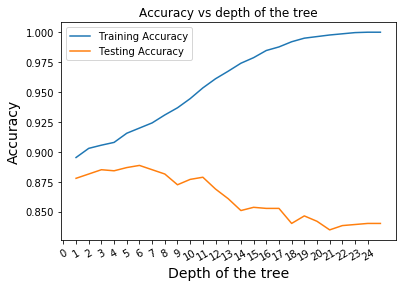

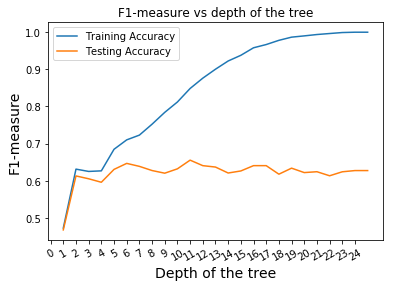

In [24]:
n_nodes = []          #vector to store the number of plots evaluated with different values of max_depth
f1_score_max_depth_training = []  #vector to store the f1-score for training dataset evaluated with different values of max_depth
f1_score_max_depth_testing = []  #vector to store the f1-score for testing dataset evaluated with different values of max_depth
accuracy_max_depth_training = [] #vector to store the accuracy for training dataset evaluated with different values of max_depth
accuracy_max_depth_testing = [] #vector to store the accuracy for testing dataset evaluated with different values of max_depth

from sklearn.tree import export_graphviz  # library to plot the tree

max_depth_ranges = {"max_depth": [1, 2, 3, 4, 5,
                                      6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]}  # parameters to evaluate the model of the maximum depth of the tree

depth_plot=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

for parameter_max_depth in max_depth_ranges["max_depth"]:    #for loop to evaluate the model with each depth of the tree
    model_decision_tree = DecisionTreeClassifier(random_state=0,max_depth=parameter_max_depth) #The decision tree function is declared to create the model
    model_decision_tree = model_decision_tree.fit(X_train, y_train)  #It is built the model with training data

    predict_decision_tree_training=model_decision_tree.predict(X_train) #Function to predict the labels for training dataset
    predict_decision_tree_testing=model_decision_tree.predict(X_test) #Function to predict the labels for testing dataset

    accuracy_max_depth_training.append(accuracy_score(y_train, predict_decision_tree_training)) #Function to calculate the accuracy using predicted and ground truth
    accuracy_max_depth_testing.append(accuracy_score(y_test, predict_decision_tree_testing)) #Function to calculate the accuracy using predicted and ground truth

    f1_score_max_depth_training.append(f1_score(y_train, predict_decision_tree_training, average='macro')) #Function to calculate the f1-measure using predicted and ground truth
    f1_score_max_depth_testing.append(f1_score( y_test, predict_decision_tree_testing, average='macro')) #Function to calculate the f1-measure using predicted and ground truth

    n_nodes.append( model_decision_tree.tree_.node_count)

# ACCURACY PLOT
plt.figure(1)
plt.plot(depth_plot,accuracy_max_depth_training,label = 'Training Accuracy') #PLot depth of the tree vs accuracy training
plt.title('Accuracy vs depth of the tree') 
plt.plot(depth_plot, accuracy_max_depth_testing,label = 'Testing Accuracy')  #PLot depth of the tree vs accuracy testing
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Depth of the tree', fontsize = 14) #function to plot the label in x
plt.legend() #this functions shows the legends
plt.xticks(num.arange(0, 25, step=1))
plt.xticks(rotation=30)         #it rotates the labels 
#max-depth
plt.figure(2)
plt.plot(depth_plot,f1_score_max_depth_training,label = 'Training Accuracy') #PLot depth of the tree vs f1-measure for training
plt.title('F1-measure vs depth of the tree') 
plt.plot(depth_plot, f1_score_max_depth_testing,label = 'Testing Accuracy') #PLot depth of the tree vs f1-measure for testing
plt.ylabel('F1-measure', fontsize = 14)    #function to plot the label in y
plt.xlabel('Depth of the tree', fontsize = 14) #function to plot the label in x
plt.legend() #this functions shows the legends
plt.xticks(num.arange(0, 25, step=1))
plt.xticks(rotation=30)         #it rotates the labels 



As we can see in the figures above, when the depth of the tree is approximately 6, the model is not overfitted because training and testing data are predicted in an optimal way. After this point testing dataset starts to decrease. For this reason, it has been selected this point as optimal. The model selected has 5 as the depth of the tree.


__Random Forest__

Random forest is an improvement technique of Decision trees. Basically, this algorith samples randomly with replacement the training set many times. Each time that it samples, it creates a tree. The number of trees that the model creates is denoted with the name of estimators. In addition, it has not been selected all the features in the sampling stage. It is possible that in some cases are only sample few attributes. After constructing one model for each tree, when it is tested some data, it passes through all of the trees or models, and the final decision is selected by voting. The class more voted is the class that belongs these input features.

To verify the overfittng, a similar technique is followed as it was applied in decision trees. Different number of estimators are tested to obtain the accuracy of the training and testing set, and it is chosen the optimal value. 


(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]), <a list of 20 Text xticklabel objects>)

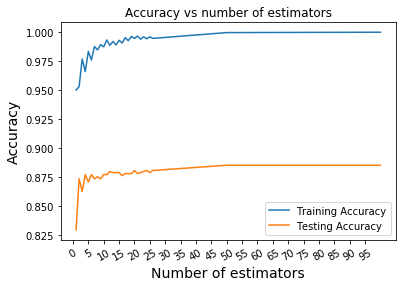

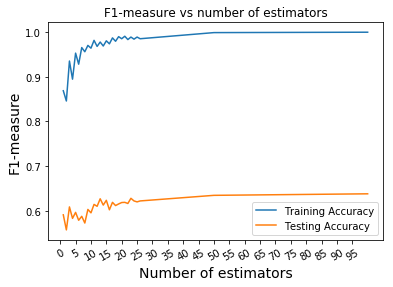

In [25]:
from sklearn.ensemble import RandomForestClassifier
f1_score_number_estimators_training_random_forest = []  #vector to store the f1-score for training dataset evaluated with different number of estimators
f1_score_number_estimators_testing_random_forest = []  #vector to store the f1-score for testing dataset evaluated with different number of estimators
accuracy_number_estimators_training_random_forest = [] #vector to store the accuracy for training dataset evaluated with different number of estimators
accuracy_number_estimators_testing_random_forest = [] #vector to store the accuracy for testing dataset evaluated with different number of estimators

number_estimators = {"n_estimators": [1, 2, 3, 4, 5,6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,50,100]}
estimators_plot=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,50,100]

for parameter in number_estimators["n_estimators"]:    #for loop to evaluate different number of estimators
    model_random_forest = RandomForestClassifier(random_state=0,n_estimators=parameter) #The random forest function is declared to create the model
    model_random_forest = model_random_forest.fit(X_train, y_train)  #It is built the model with training data

    predict_random_forest_training=model_random_forest.predict(X_train) #Function to predict the labels for training dataset
    predict_random_forest_testing=model_random_forest.predict(X_test) #Function to predict the labels for testing dataset

    accuracy_number_estimators_training_random_forest.append(accuracy_score(y_train,predict_random_forest_training)) #Function to calculate the accuracy using predicted and ground truth
    accuracy_number_estimators_testing_random_forest.append(accuracy_score(y_test, predict_random_forest_testing)) #Function to calculate the accuracy using predicted and ground truth

    f1_score_number_estimators_training_random_forest.append(f1_score(y_train, predict_random_forest_training, average='macro')) #Function to calculate the f1-measure using predicted and ground truth
    f1_score_number_estimators_testing_random_forest.append(f1_score( y_test, predict_random_forest_testing, average='macro')) #Function to calculate the f1-measure using predicted and ground truth

# ACCURACY PLOT
plt.figure(1)
plt.plot(estimators_plot,accuracy_number_estimators_training_random_forest,label = 'Training Accuracy') #Plot number of estimators vs training accuracy
plt.title('Accuracy vs number of estimators') 
plt.plot(estimators_plot, accuracy_number_estimators_testing_random_forest,label = 'Testing Accuracy') #Plot number of estimators vs testing accuracy
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of estimators', fontsize = 14) #function to plot the label in x
plt.legend() #this functions shows the legends
plt.xticks(num.arange(0, 100, step=5))
plt.xticks(rotation=30)         #it rotates the labels 
#max-depth
plt.figure(2)
plt.plot(estimators_plot,f1_score_number_estimators_training_random_forest,label = 'Training Accuracy') #Plot number of estimators vs f1-measure for training 
plt.title('F1-measure vs number of estimators') 
plt.plot(estimators_plot, f1_score_number_estimators_testing_random_forest,label = 'Testing Accuracy') #Plot number of estimators vs f1-measure for testing 
plt.ylabel('F1-measure', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of estimators', fontsize = 14) #function to plot the label in x
plt.legend() #this functions shows the legends
plt.xticks(num.arange(0, 100, step=5))
plt.xticks(rotation=30)         #it rotates the labels 

As we can see in the figures above, when the forest has more than 25 trees the accuracy does not improve. In addition, we are interested in finding the best accuracy in the testing set with the less variance between the training and testing set. For this reason, it has been plotted both variables using the following lines of code

Text(0.5, 0, 'Accuracy')

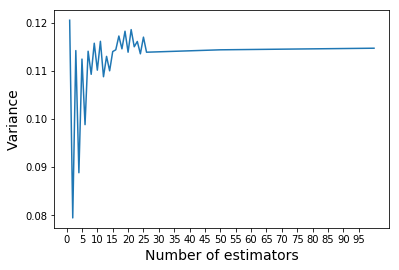

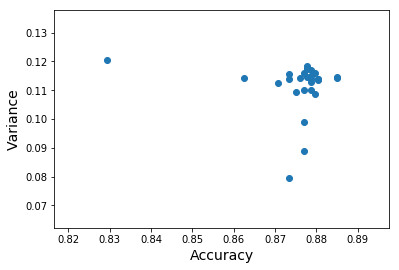

In [26]:
plt.figure(2)
variance_accuracy=list(num.array(accuracy_number_estimators_training_random_forest) - num.array(accuracy_number_estimators_testing_random_forest))  #find the difference between the accuracy of training minus the accuracy testing
plt.plot(estimators_plot, variance_accuracy,label = 'Testing Accuracy') #it is called the function to plot the number of estimators vs the variance
plt.ylabel('Variance', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of estimators', fontsize = 14) #function to plot the label in x
plt.xticks(num.arange(0, 100, step=5))
plt.figure(3)
plt.scatter(accuracy_number_estimators_testing_random_forest, variance_accuracy,label = 'Testing Accuracy') #it is plotted the testing accuracy vs the variance
plt.ylabel('Variance', fontsize = 14)    #function to plot the label in y
plt.xlabel('Accuracy', fontsize = 14) #function to plot the label in x

The best model is reached when the accuracy is near to 88%, and the variance is 0.06. This point corresponds to the most rigth and bottom point. For this reason, the best model is when the number of estimators is 4.

__NEURAL NETWORK__

Neural networks try to mimic the functions of the brain. For this reason, a neural network can have multiple hidden layers with neurons. Generally this neural network has connections which have weights. These weigths are updated using back-propagation where the cost function is the mean square error. In neural network there are two parameters which are important to increase the accuracy of an specific problem. These parameters are the number of layers and the number of neurons in each layer. While more layers and more neurons, it is reached greater accuracy, but it can take more time to train the network, and it is possible to overfit the model. To do easier the analysis, it has been used only 1 hidden layer, and the number of neurons have been changed. A similar approach to verify overfitting is used similar to the exposed in decision trees and random forest. In this method the accuracy of the training and testing data is plotted to verify not overfitting. It is necessary to highlight that standard normalization has been applied before neural network because it is sensitive to scalation. Standard normalization has been done because min-max normalization is affected by outliers.

In [27]:
from sklearn.preprocessing import StandardScaler
standard_normalization =StandardScaler()
standard_normalization = standard_normalization.fit(features)
normalized_features = standard_normalization.transform(features)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normalized_features,target , test_size = 0.27,random_state=0)   #function to split the data in training and testing

(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]), <a list of 20 Text xticklabel objects>)

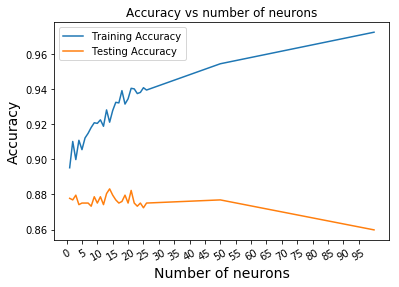

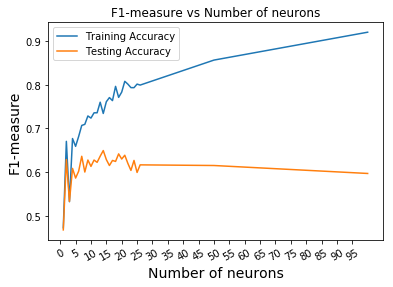

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13))
f1_score_number_neurons_training_nn = []  #vector to store the f1-score for training dataset evaluated with different number of neurons
f1_score_number_neurons_testing_nn = []  #vector to store the f1-score for testing dataset evaluated with different number of neurons
accuracy_number_neurons_training_nn = [] #vector to store the accuracy for training dataset evaluated with different number of neurons
accuracy_number_neurons_testing_nn = [] #vector to store the accuracy for testing dataset evaluated with different number of neurons

number_neurons = {"hidden_layer_sizes": [1, 2, 3, 4, 5,6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,50,100]}
number_neurons_plot=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,50,100]

for parameter in number_neurons["hidden_layer_sizes"]:    #for loop to evaluate the model with different number of neurons
    model_nn = MLPClassifier(random_state=0,hidden_layer_sizes=(parameter)) #The neural network function is declared to create the model
    model_nn = model_nn .fit(X_train_norm, y_train_norm)  #It is built the model with training data

    predict_nn_training=model_nn.predict(X_train_norm) #Function to predict the labels for training dataset
    predict_nn_testing=model_nn.predict(X_test_norm) #Function to predict the labels for testing dataset

    accuracy_number_neurons_training_nn.append(accuracy_score(y_train_norm,predict_nn_training)) #Function to calculate the accuracy using predicted and ground truth
    accuracy_number_neurons_testing_nn.append(accuracy_score(y_test_norm, predict_nn_testing)) #Function to calculate the accuracy using predicted and ground truth

    f1_score_number_neurons_training_nn.append(f1_score(y_train_norm, predict_nn_training, average='macro')) #Function to calculate the f1-measure using predicted and ground truth
    f1_score_number_neurons_testing_nn.append(f1_score(y_test_norm, predict_nn_testing, average='macro')) #Function to calculate the f1-measure using predicted and ground truth

# ACCURACY PLOT
plt.figure(1)
plt.plot(number_neurons_plot,accuracy_number_neurons_training_nn,label = 'Training Accuracy') #Plot the number of neurons vs training accuracy
plt.title('Accuracy vs number of neurons') 
plt.plot(number_neurons_plot,  accuracy_number_neurons_testing_nn,label = 'Testing Accuracy') #Plot the number of neurons vs testing accuracy
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of neurons', fontsize = 14) #function to plot the label in x
plt.legend() #this functions shows the legends
plt.xticks(num.arange(0, 100, step=5))
plt.xticks(rotation=30)         #it rotates the labels 
#max-depth
plt.figure(2)
plt.plot(number_neurons_plot, f1_score_number_neurons_training_nn,label = 'Training Accuracy')  #Plot the number of neurons vs f1 meaures for training
plt.title('F1-measure vs Number of neurons') 
plt.plot(number_neurons_plot, f1_score_number_neurons_testing_nn,label = 'Testing Accuracy') #Plot the number of neurons vs f1 meaures for testing
plt.ylabel('F1-measure', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of neurons', fontsize = 14) #function to plot the label in x
plt.legend() #this functions shows the legends
plt.xticks(num.arange(0, 100, step=5))
plt.xticks(rotation=30)         #it rotates the labels 

We are interested in selecting a model with high testing accuracy and low variance. For this reason, it is plotted the variance(training accuracy-testing accuracy) vs number of neurons

([<matplotlib.axis.XTick at 0x2443b5ae208>,
 <a list of 20 Text xticklabel objects>)

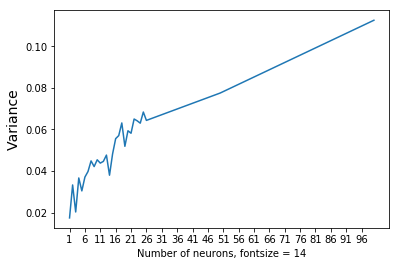

In [29]:
plt.figure(5)
variance_accuracy=list(num.array(accuracy_number_neurons_training_nn) - num.array(accuracy_number_neurons_testing_nn))  #find the difference between the accuracy of training minus the accuracy testing
plt.plot(number_neurons_plot, variance_accuracy,label = 'Testing Accuracy') #it is called the function to plot the number of neurons vs the variance
plt.ylabel('Variance', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of neurons, fontsize = 14') #function to plot the label in x
plt.xticks(num.arange(1, 100, step=5))


When the number of neurons is 15 the variance is the lowest as we can see in the figure above. In addition, when the number of neurons is ten, the maximun accuracy in the testing set is reached. For this reason, it has been selected the model of a neural network with 1 hidden layer and 10 neurons.

__4. Create a few plots of your model on the test data, two of the data dimensions at a time, indicating the predicted elements of each class using different colors or shapes. You may need to try plotting various pairs of dimensions to see which provide some interesting result. Be sure to label your axis and legend. Why is separation better on some plots than others?__

Before plotting attributes, it is necessary to summarize the configurations of models chosen.

Decision tree with depth=6.

Random forest with number of estimators=4

Neural network with number of neurons=15

In all these models, it has been used 73% of the dataset for training and 27% for testing.

In this section, it has been plotted the attributes with numerical values to visualize in a better way how the classifiers work. 


__DECISION TREES__

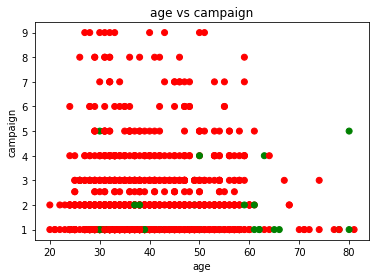

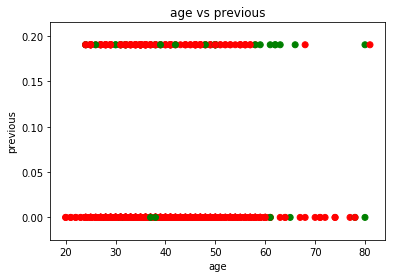

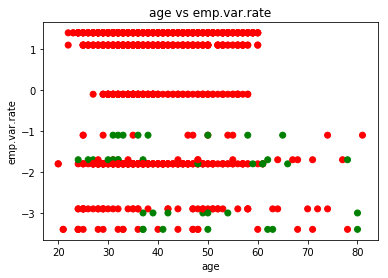

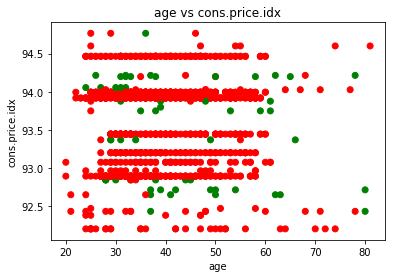

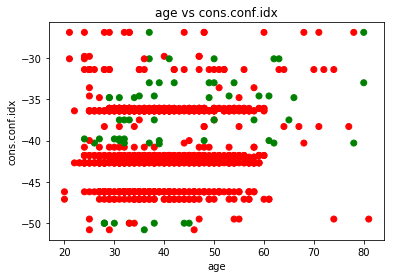

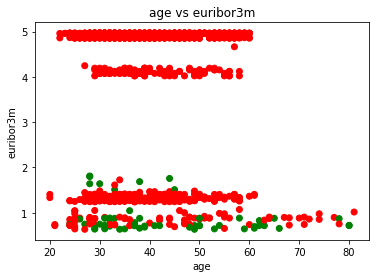

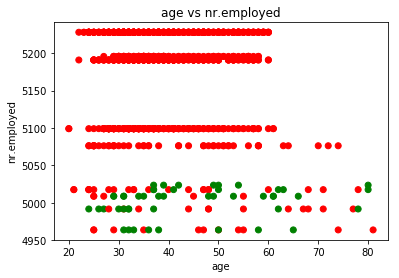

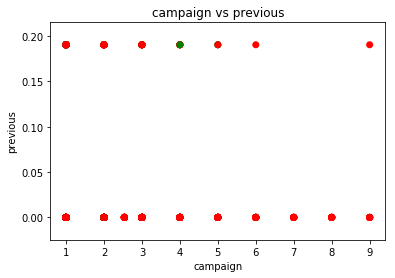

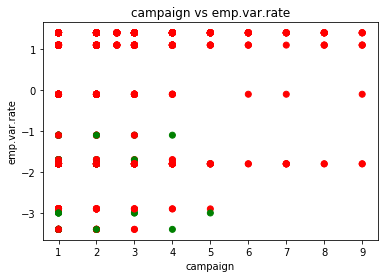

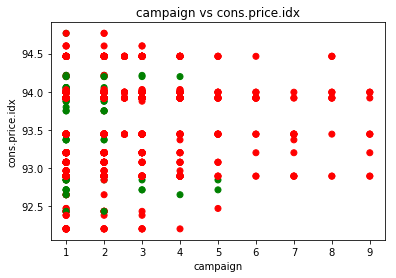

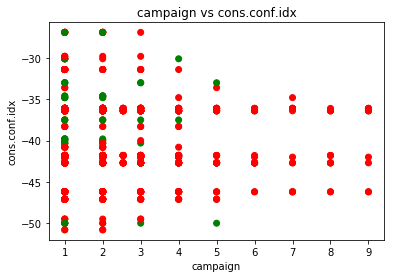

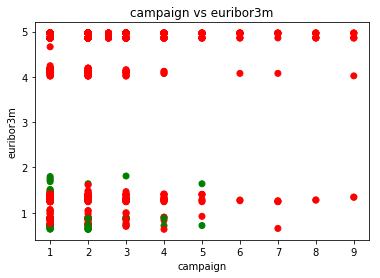

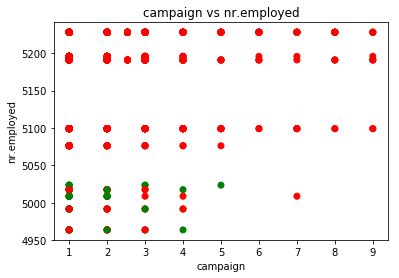

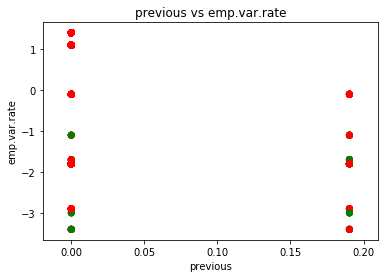

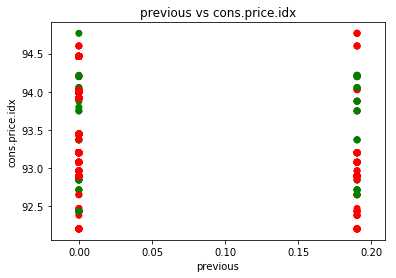

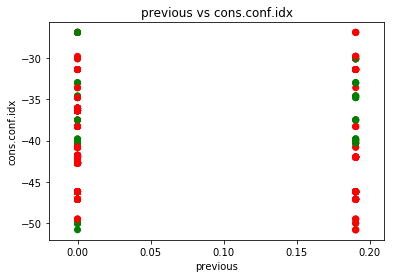

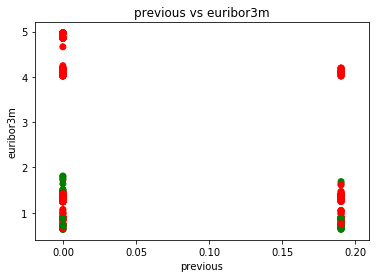

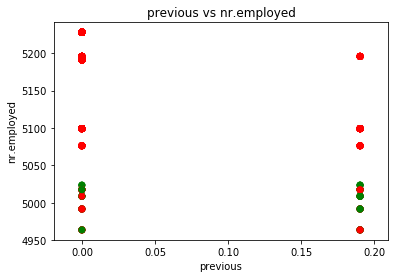

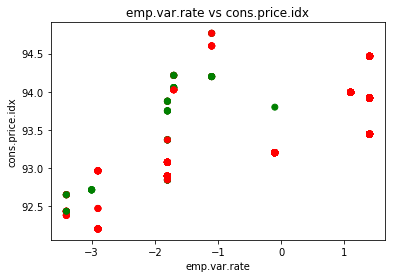

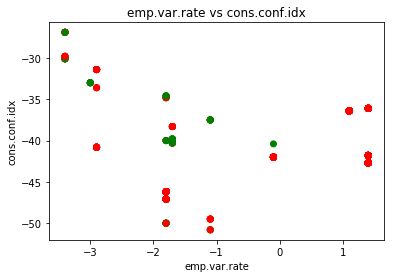

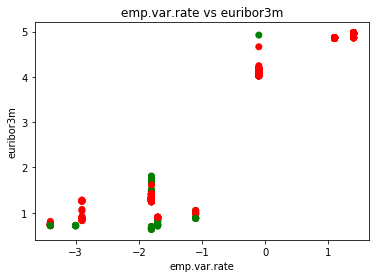

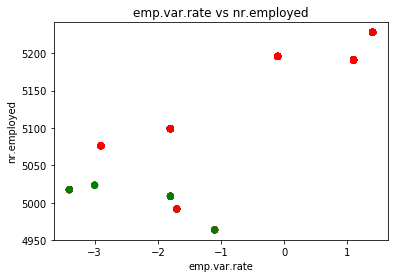

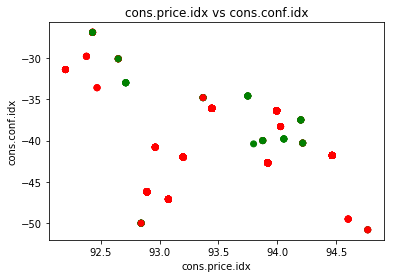

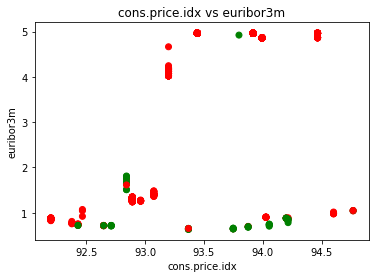

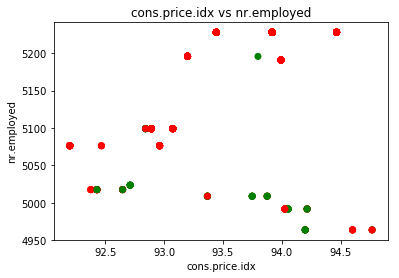

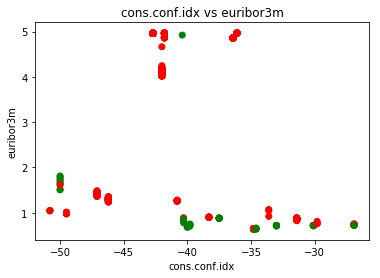

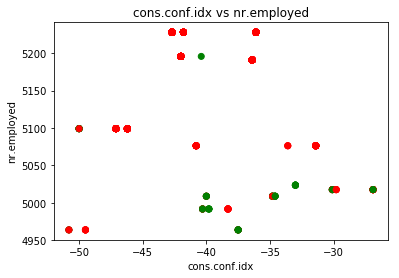

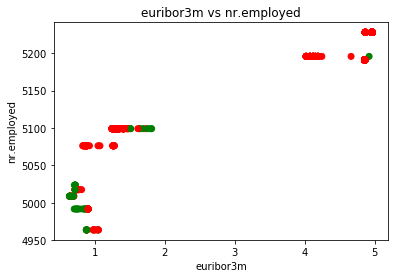

In [30]:
from sklearn.tree import DecisionTreeClassifier   #decision tree library is imported
from sklearn.metrics import f1_score              #function to calculate f1-score is imported
from sklearn.metrics import accuracy_score        #function to calculate accuracy is imported

model_decision_tree = DecisionTreeClassifier(random_state=0,max_depth=6)   #The decision tree function is declared to create the model
model_decision_tree = model_decision_tree.fit(X_train, y_train) #It is built the model with training data
predict_decision_tree_training=model_decision_tree.predict(X_train) #Function to predict the labels for training dataset
predict_decision_tree_testing=model_decision_tree.predict(X_test) #Function to predict the labels for testing dataset

columnsNamesArr = X_train.columns.values
colors = ['red','green']   #colors to plot the labels 
aux=1    
number_attributes=X_test.shape[1]  # it is extracted the number of attributes 
number_attributes=8
for i in range(0,number_attributes):
    for j in range(i+1,number_attributes):
        aux=aux+1
        plt.figure(aux)                          #Create new plot
        plt.title('%s vs %s'%(columnsNamesArr[i],columnsNamesArr[j])) # plot the title
        plt.scatter(X_test.iloc[:,i],X_test.iloc[:,j],c=predict_decision_tree_testing,cmap=matplotlib.colors.ListedColormap(colors))#plot the attributes with labels
        plt.xlabel(columnsNamesArr[i]) #plot label in x
        plt.ylabel(columnsNamesArr[j])  #plot label in y
        #plt.xlabel('Attribute %i'%i)
        #plt.ylabel('Attribute %i'%j)

__RANDOM FOREST__

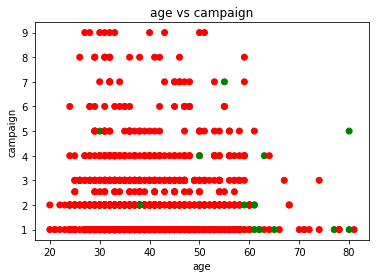

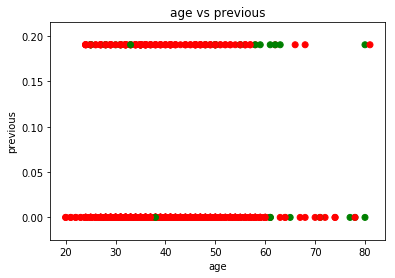

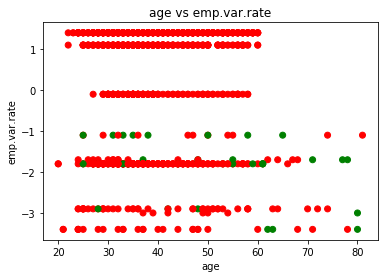

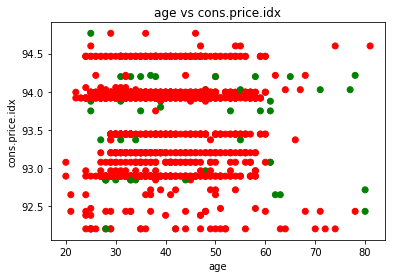

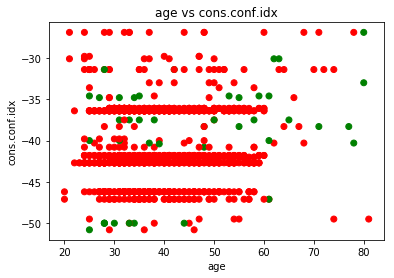

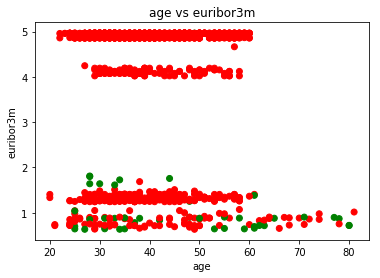

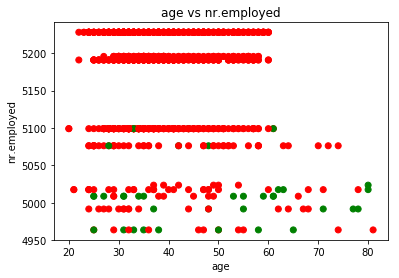

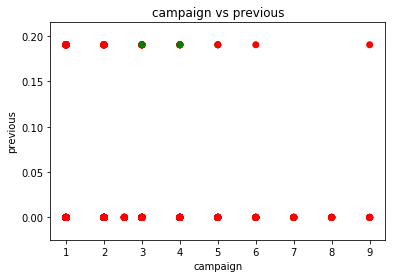

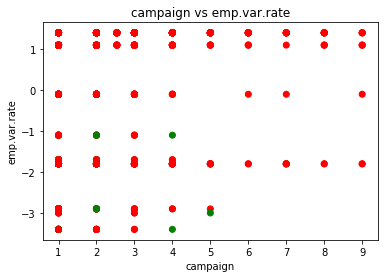

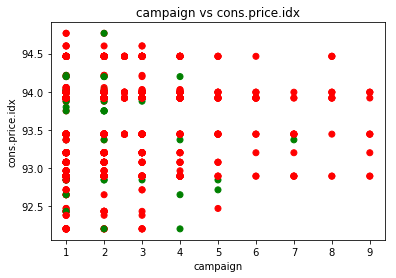

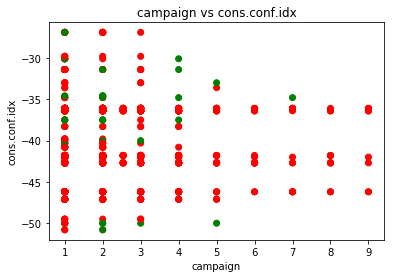

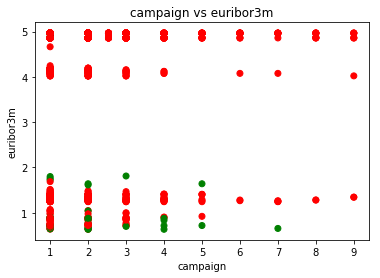

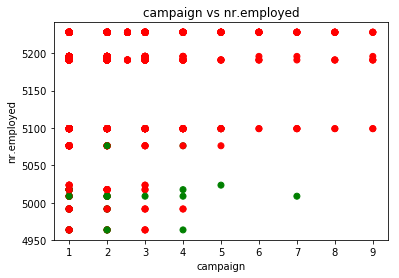

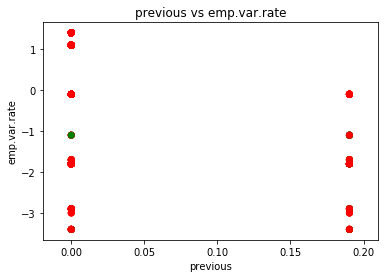

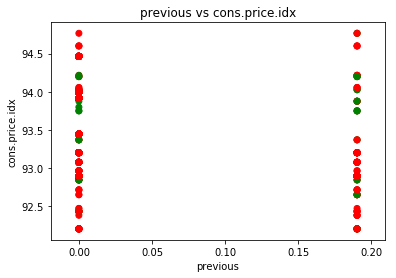

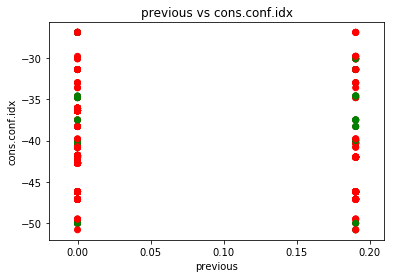

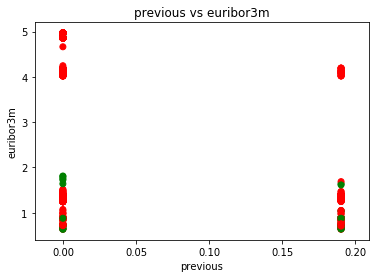

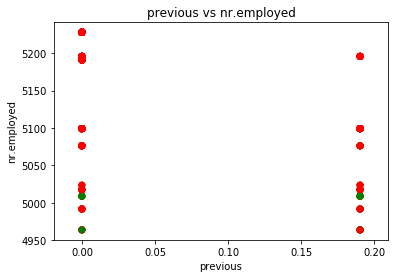

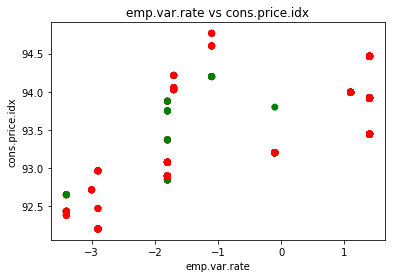

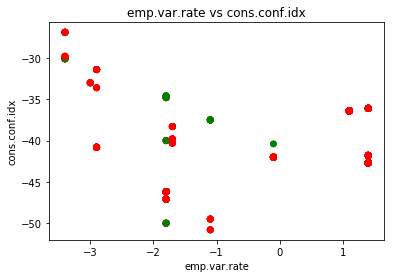

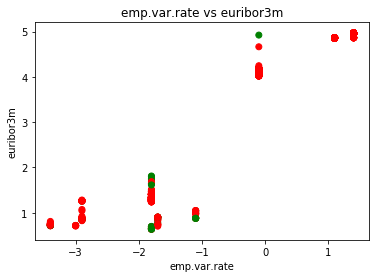

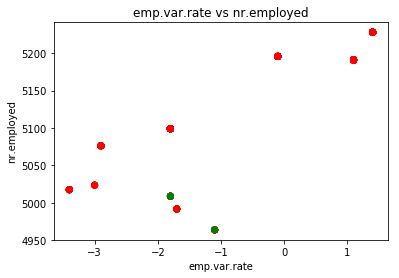

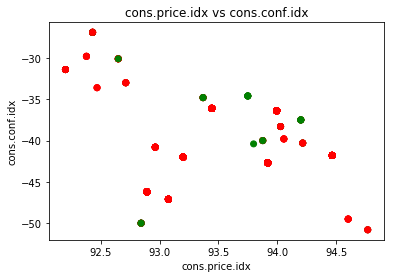

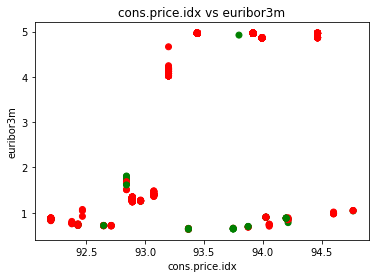

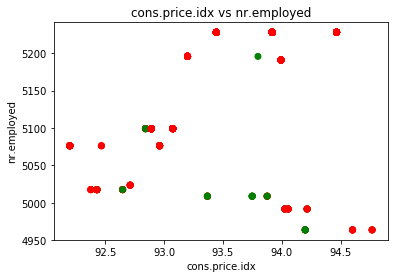

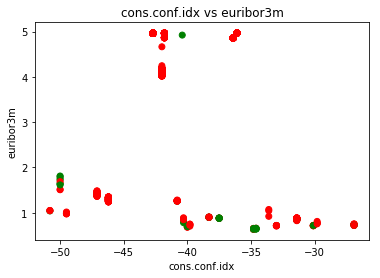

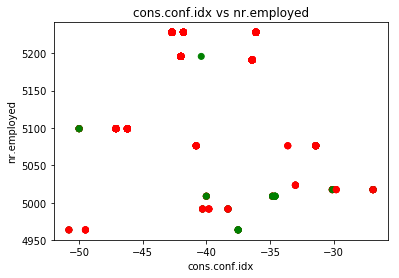

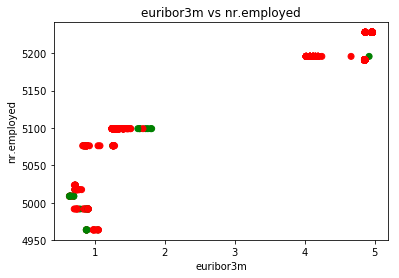

In [31]:
model_random_forest = RandomForestClassifier(random_state=0,n_estimators=4) #The random forest function is declared to create the modelmodel_random_forest = model_random_forest.fit(X_train, y_train)  #It is built the model with training data
model_random_forest = model_random_forest.fit(X_train, y_train)  #It is built the model with training data

predict_random_forest_training=model_random_forest.predict(X_train) #Function to predict the labels for training dataset
predict_random_forest_testing=model_random_forest.predict(X_test) #Function to predict the labels for testing dataset

columnsNamesArr = X_train.columns.values
colors = ['red','green']   #colors to plot the labels 
aux=1    
number_attributes=8
for i in range(0,number_attributes):
    for j in range(i+1,number_attributes):
        aux=aux+1
        plt.figure(aux)                          #Create new plot
        plt.title('%s vs %s'%(columnsNamesArr[i],columnsNamesArr[j])) # plot the title
        plt.scatter(X_test.iloc[:,i],X_test.iloc[:,j],c=predict_random_forest_testing,cmap=matplotlib.colors.ListedColormap(colors))#plot the attributes with labels
        plt.xlabel(columnsNamesArr[i]) #plot label in x
        plt.ylabel(columnsNamesArr[j])  #plot label in y
        #plt.xlabel('Attribute %i'%i)
        #plt.ylabel('Attribute %i'%j)

__NEURAL NETWORK__

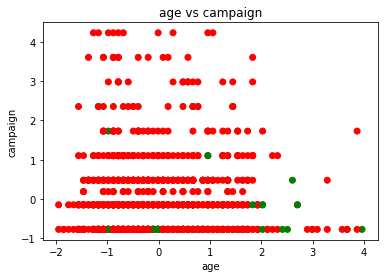

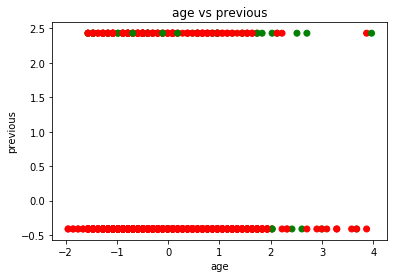

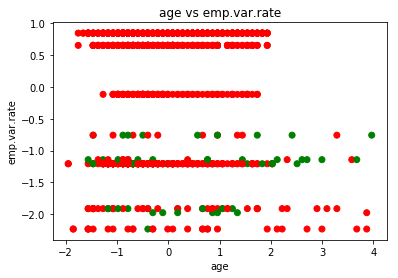

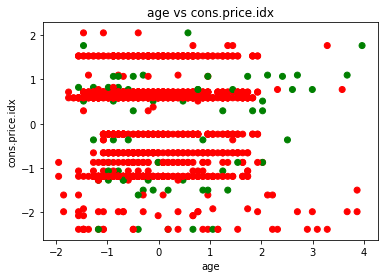

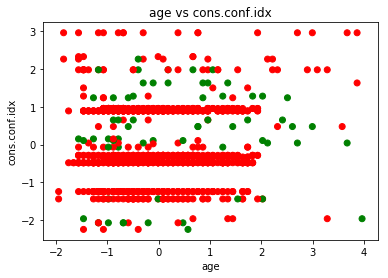

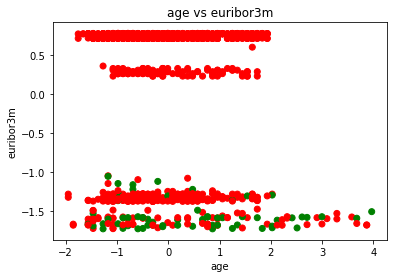

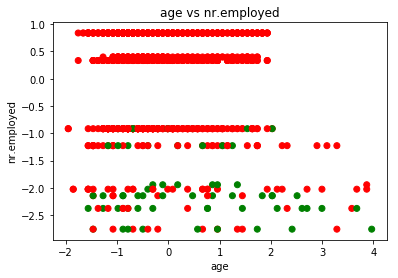

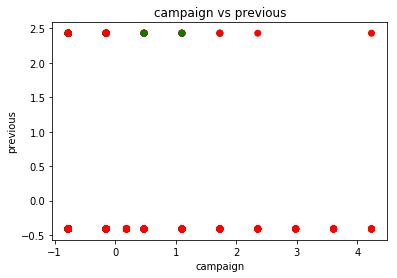

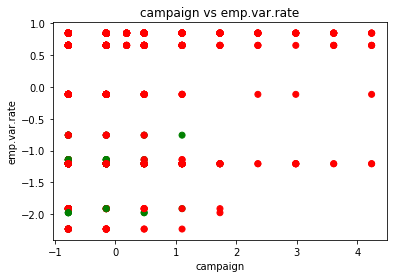

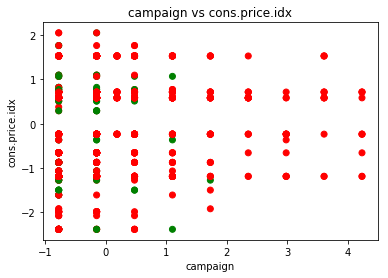

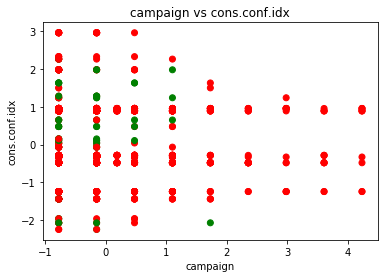

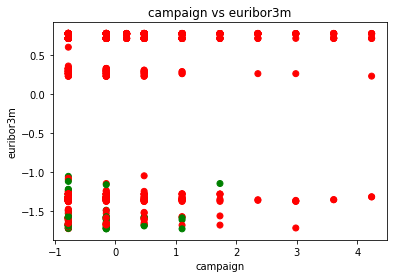

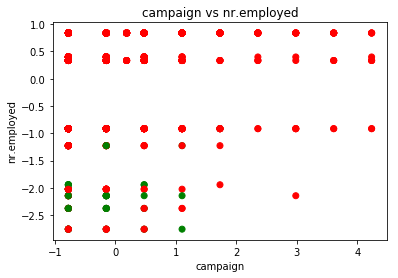

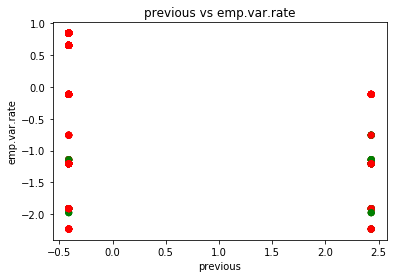

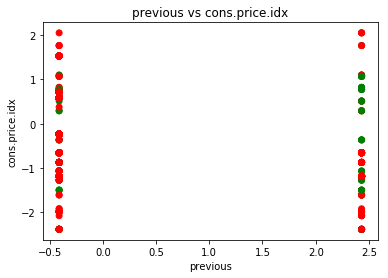

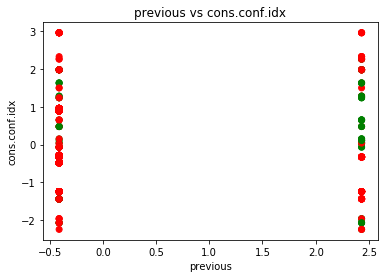

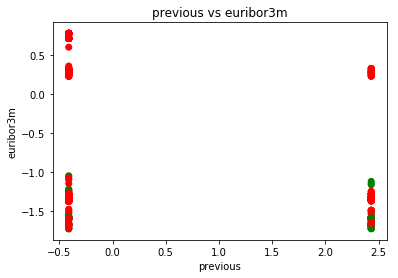

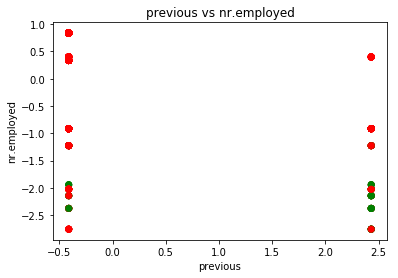

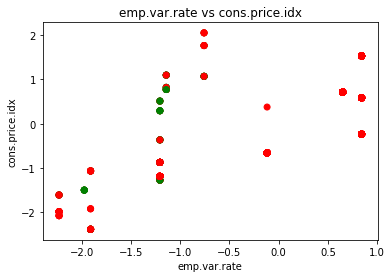

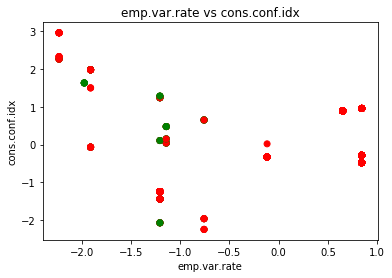

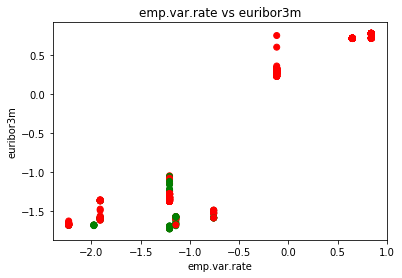

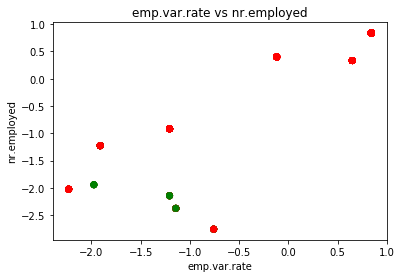

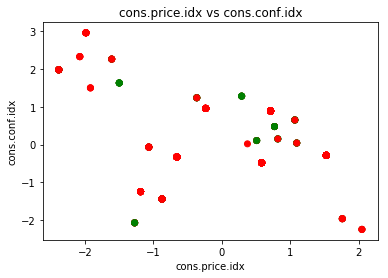

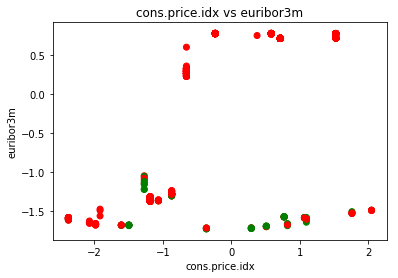

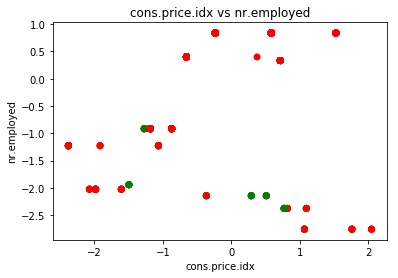

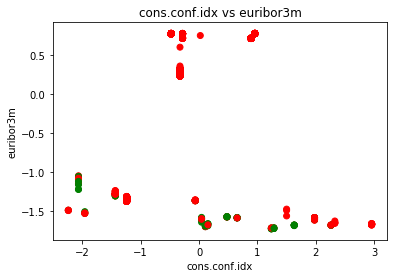

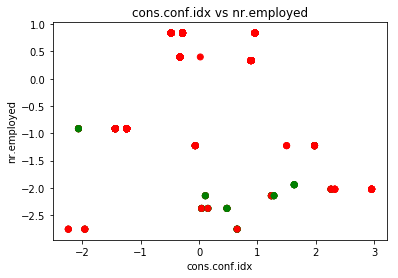

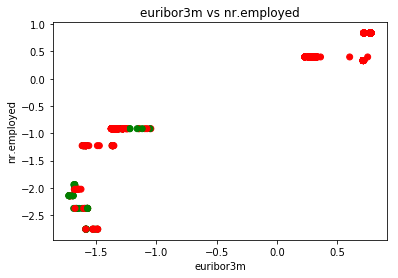

In [32]:
model_nn = MLPClassifier(random_state=0,hidden_layer_sizes=(15)) #The neural network function is declared to create the model
model_nn = model_nn .fit(X_train_norm, y_train_norm)  #It is built the model with training data

predict_nn_training=model_nn.predict(X_train_norm) #Function to predict the labels for training dataset
predict_nn_testing=model_nn.predict(X_test_norm) #Function to predict the labels for testing dataset

columnsNamesArr = X_train.columns.values
colors = ['red','green']   #colors to plot the labels 
aux=1    
number_attributes=8
for i in range(0,number_attributes):
    for j in range(i+1,number_attributes):
        aux=aux+1
        plt.figure(aux)                          #Create new plot
        plt.title('%s vs %s'%(columnsNamesArr[i],columnsNamesArr[j])) # plot the title
        plt.scatter(X_test_norm[:,i],X_test_norm[:,j],c=predict_nn_testing,cmap=matplotlib.colors.ListedColormap(colors))#plot the attributes with labels
        plt.xlabel(columnsNamesArr[i]) #plot label in x
        plt.ylabel(columnsNamesArr[j])  #plot label in y
        #plt.xlabel('Attribute %i'%i)
        #plt.ylabel('Attribute %i'%j)

It is difficult to establish visually which is the best algorithm to classify samples for the current dataset because the separation between both classes are not well defined when the data is plotted only in two dimensions. If the data is plotted in higher dimensions, we can visualize in a better way the boundaries. For this reason, it is necessary to compare each classifier in terms of accuracy, and f1-measure.


__5. Produce a table with the true/false positive/negative metrics as well as accuracies. Compare the values using bar charts__

In [33]:
from sklearn.metrics import confusion_matrix
decision_tree_confusion_matrix=confusion_matrix(y_test, predict_decision_tree_testing)   #function to retrieve confusion matrix
decision_tree_accuracy=accuracy_score(y_test, predict_decision_tree_testing)     #function to retrieve accuracy
decision_tree_f1_measure=f1_score(y_test, predict_decision_tree_testing)           #function to retrieve f1-measure
print('Decision Tree confusion matrix')
print(decision_tree_confusion_matrix)
random_forest_confusion_matrix=confusion_matrix(y_test, predict_random_forest_testing) #function to retrieve confusion matrix
random_forest_accuracy=accuracy_score(y_test, predict_random_forest_testing)     #function to retrieve accuracy
random_forest_f1_measure=f1_score(y_test, predict_random_forest_testing)           #function to retrieve f1-measure
print('Random forest confusion matrix')
print(random_forest_confusion_matrix)
neural_network_confusion_matrix=confusion_matrix(y_test_norm, predict_nn_testing) #function to retrieve confusion matrix
neural_network_accuracy=accuracy_score(y_test,predict_nn_testing)     #function to retrieve accuracy
neural_network_f1_measure=f1_score(y_test, predict_nn_testing)           #function to retrieve f1-measure
print('Neural network confusion matrix')
print(neural_network_confusion_matrix)

Decision Tree confusion matrix
[[955  22]
 [102  34]]
Random forest confusion matrix
[[955  22]
 [115  21]]
Neural network confusion matrix
[[947  30]
 [104  32]]


955
DECISION TREE
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       977
           1       0.61      0.25      0.35       136

   micro avg       0.89      0.89      0.89      1113
   macro avg       0.76      0.61      0.65      1113
weighted avg       0.87      0.89      0.87      1113

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       977
           1       0.49      0.15      0.23       136

   micro avg       0.88      0.88      0.88      1113
   macro avg       0.69      0.57      0.58      1113
weighted avg       0.84      0.88      0.85      1113

NEURAL NETWORK
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       977
           1       0.52      0.24      0.32       136

   micro avg       0.88      0.88      0.88      1113
   macro avg       0.71      0.60      0.63      1113
weighted avg       0.85    

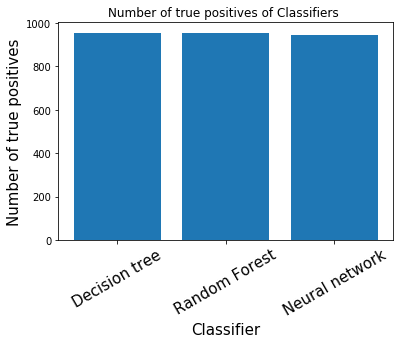

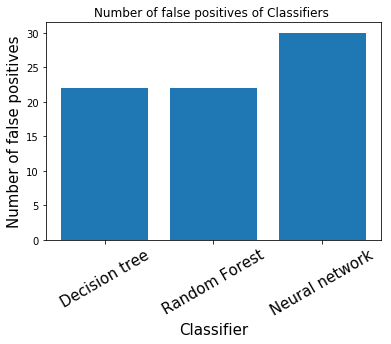

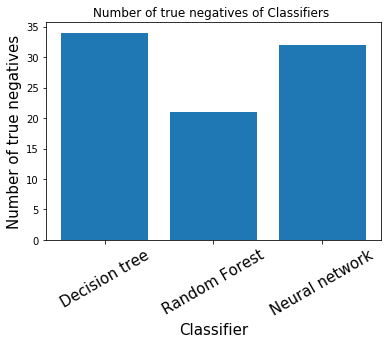

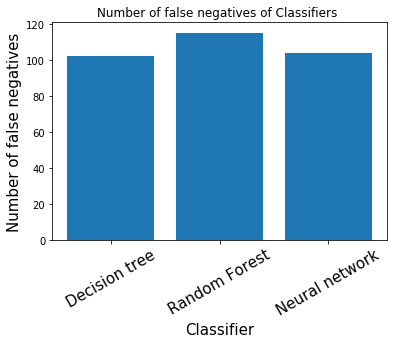

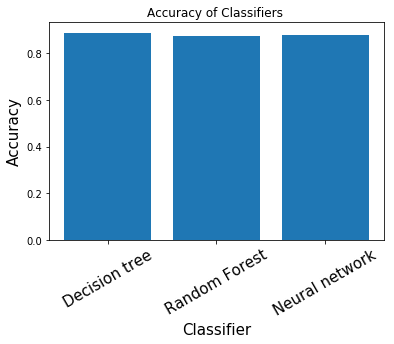

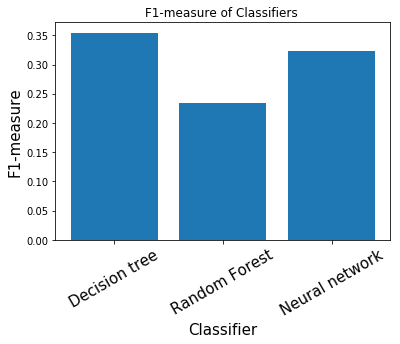

In [34]:
classifier = ['Decision tree', 'Random Forest', 'Neural network']
print(decision_tree_confusion_matrix[0,0])
true_positives=[decision_tree_confusion_matrix[0,0],random_forest_confusion_matrix[0,0],neural_network_confusion_matrix[0,0]] # Extract true positives from the confusion matrix
false_positives=[decision_tree_confusion_matrix[0,1],random_forest_confusion_matrix[0,1],neural_network_confusion_matrix[0,1]]# Extract false positives from the confusion matrix
true_negatives=[decision_tree_confusion_matrix[1,1],random_forest_confusion_matrix[1,1],neural_network_confusion_matrix[1,1]] # Extract true negatives from the confusion matrix
false_negatives=[decision_tree_confusion_matrix[1,0],random_forest_confusion_matrix[1,0],neural_network_confusion_matrix[1,0]]# Extract false negatives from the confusion matrix
accuracy=[decision_tree_accuracy,random_forest_accuracy,neural_network_accuracy] #construct an accuracy vector
f1_measure=[decision_tree_f1_measure,random_forest_f1_measure,neural_network_f1_measure] #construct an f1 measure vector
#TRUE POSITIVES
plt.figure(10)          #generate the plot
plt.bar(classifier, true_positives)    #plot the classifiers vs true positives
#plt.yticks(num.arange(960, 990, step=1))
plt.xlabel('Classifier', fontsize=15)  #generate the x label
plt.ylabel('Number of true positives', fontsize=15)#generate the y label
plt.xticks(classifier, fontsize=15, rotation=30) #rotate the labels in x
plt.title('Number of true positives of Classifiers ')#generate the title for the graph
#FALSE POSITIVES
plt.figure(11)   #generate the plot
plt.bar(classifier, false_positives)   #plot the classifiers vs false positives
#plt.yticks(num.arange(960, 990, step=1))
plt.xlabel('Classifier', fontsize=15) #generate the x label
plt.ylabel('Number of false positives', fontsize=15)#generate the y label
plt.xticks(classifier, fontsize=15, rotation=30) #rotate the labels in x
plt.title('Number of false positives of Classifiers ') #generate the title for the graph
#TRUE NEGATIVES
plt.figure(12)    #generate the plot
plt.bar(classifier, true_negatives)   #plot the classifiers vs true negatives
#plt.yticks(num.arange(960, 990, step=1))
plt.xlabel('Classifier', fontsize=15) #generate the x label
plt.ylabel('Number of true negatives', fontsize=15)#generate the y label
plt.xticks(classifier, fontsize=15, rotation=30) #rotate the labels in x
plt.title('Number of true negatives of Classifiers ') #generate the title for the graph
#FALSE NEGATIVES
plt.figure(13)  #generate the plot
plt.bar(classifier, false_negatives)    #plot the classifiers vs false negatives
#plt.yticks(num.arange(960, 990, step=1))
plt.xlabel('Classifier', fontsize=15) #generate the x label
plt.ylabel('Number of false negatives', fontsize=15)#generate the y label
plt.xticks(classifier, fontsize=15, rotation=30) #rotate the labels in x
plt.title('Number of false negatives of Classifiers ') #generate the title for the graph
#ACCURACY
plt.figure(14)   #generate the plot
plt.bar(classifier, accuracy)    #plot the classifiers vs accuracy
#plt.yticks(num.arange(960, 990, step=1))
plt.xlabel('Classifier', fontsize=15)#generate the x label
plt.ylabel('Accuracy', fontsize=15)#generate the y label
plt.xticks(classifier, fontsize=15, rotation=30) #rotate the labels in x
plt.title('Accuracy of Classifiers ') #generate the title for the graph

#F1-MEASURE

plt.figure(15) #generate the plot 
plt.bar(classifier, f1_measure)    #plot the classifiers vs f1 measures
#plt.yticks(num.arange(960, 990, step=1))
plt.xlabel('Classifier', fontsize=15)#generate the x label
plt.ylabel('F1-measure', fontsize=15)#generate the y label
plt.xticks(classifier, fontsize=15, rotation=30) #rotate the labels in x
plt.title('F1-measure of Classifiers ') #generate the title for the graph


from sklearn.metrics import classification_report, confusion_matrix  #library to use confusion matrix and classification_report
print('DECISION TREE')  # plot the title for the classifier
print(classification_report(y_test, predict_decision_tree_testing))  #it is printed the results of the decision tree clasifier
print('RANDOM FOREST')  # plot the title for the classifier
print(classification_report(y_test, predict_random_forest_testing))  #it is printed the results of the random forest
print('NEURAL NETWORK')  # plot the title for the classifier
print(classification_report(y_test,  predict_nn_testing))  #it is printed the results of the random forest




In terms of f1-measure, decision tree performs better as we can see in the bar charts.

In [35]:

from sklearn.metrics import classification_report, confusion_matrix  #library to use confusion matrix and classification_report
print('DECISION TREE')  # plot the title for the classifier
print(classification_report(y_test, predict_decision_tree_testing))  #it is printed the results of the decision tree clasifier
print('RANDOM FOREST')  # plot the title for the classifier
print(classification_report(y_test, predict_random_forest_testing))  #it is printed the results of the random forest
print('NEURAL NETWORK')  # plot the title for the classifier
print(classification_report(y_test,  predict_nn_testing))  #it is printed the results of the random forest



DECISION TREE
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       977
           1       0.61      0.25      0.35       136

   micro avg       0.89      0.89      0.89      1113
   macro avg       0.76      0.61      0.65      1113
weighted avg       0.87      0.89      0.87      1113

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       977
           1       0.49      0.15      0.23       136

   micro avg       0.88      0.88      0.88      1113
   macro avg       0.69      0.57      0.58      1113
weighted avg       0.84      0.88      0.85      1113

NEURAL NETWORK
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       977
           1       0.52      0.24      0.32       136

   micro avg       0.88      0.88      0.88      1113
   macro avg       0.71      0.60      0.63      1113
weighted avg       0.85      0.

__6.Provide a short explanation of the results you have shown and what it means. Which classification method performed better? Why? Contrast performance with classification from the previous homework and comment on the difference, if any [5].__


__SVM LINEAR__

Due to the fact that SVM can be affected by different scales of features, it has been normalized the data before to apply SVM.

In [36]:
from sklearn.svm import SVC  # library to use SVM 
svclassifier = SVC(kernel='linear',random_state=0)   #it will be used linear SVM
svclassifier1 =svclassifier.fit(X_train_norm, y_train_norm)    #it is trained SVM linear with training data
predict_svm_linear_testing=svclassifier1.predict(X_test_norm) #Function to predict the labels for testing dataset
print(classification_report(y_test_norm, predict_svm_linear_testing ))  #it is printed the results of thesvm linear clasifier



              precision    recall  f1-score   support

           0       0.90      0.97      0.94       977
           1       0.55      0.24      0.34       136

   micro avg       0.88      0.88      0.88      1113
   macro avg       0.73      0.61      0.64      1113
weighted avg       0.86      0.88      0.86      1113



__KNN__

KNN can be affected by attributes with different scales. Therefore, before to apply KNN, it has been normalized. Due to the fact that the number of neighbors can affect to the accuracy for the final model, it has been plotted the accuracy with training and testing data to choose the optimal model as it was done in decision trees, random forest and neural networks.


(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]), <a list of 20 Text xticklabel objects>)

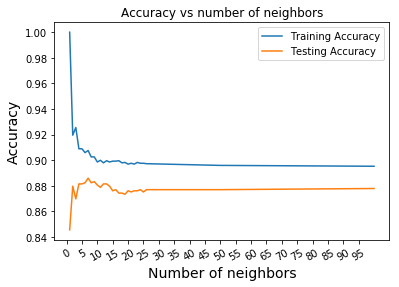

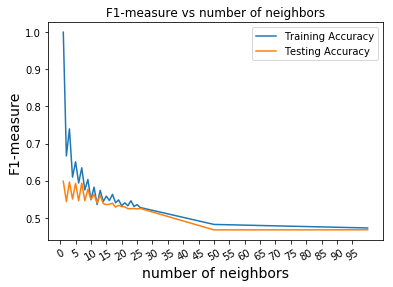

In [37]:
from sklearn.neighbors import KNeighborsClassifier #library to use k nearest neighbor

f1_score_number_of_neighbors_training_knn = []  #vector to store the f1-score for training dataset evaluated with different number of neighbors
f1_score_number_of_neighbors_testing_knn = []  #vector to store the f1-score for testing dataset evaluated with different number of neighbors
accuracy_number_of_neighbors_training_knn = [] #vector to store the accuracy for training dataset evaluated with different number of neighbors
accuracy_number_of_neighbors_testing_knn = [] #vector to store the accuracy for testing dataset evaluated with different number of neighbors

number_neighbors = {"n_neighbors": [1, 2, 3, 4, 5,6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,50,100]}
number_neighbors_plot=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,50,100]

for parameter in number_neighbors["n_neighbors"]:    #for loop to evaluate the model with different number of neighbors
    model_knn =  KNeighborsClassifier(n_neighbors=parameter)  #The knn is declared to create the model
    model_knn = model_knn.fit(X_train_norm, y_train_norm)  #It is built the model with training data

    predict_knn_training=model_knn.predict(X_train_norm) #Function to predict the labels for training dataset
    predict_knn_testing=model_knn.predict(X_test_norm) #Function to predict the labels for testing dataset

    accuracy_number_of_neighbors_training_knn.append(accuracy_score(y_train_norm,predict_knn_training)) #Function to calculate the accuracy using predicted and ground truth
    accuracy_number_of_neighbors_testing_knn.append(accuracy_score(y_test_norm, predict_knn_testing)) #Function to calculate the accuracy using predicted and ground truth

    f1_score_number_of_neighbors_training_knn.append(f1_score(y_train_norm,predict_knn_training, average='macro')) #Function to calculate the f1-measure using predicted and ground truth
    f1_score_number_of_neighbors_testing_knn.append(f1_score(y_test_norm, predict_knn_testing, average='macro')) #Function to calculate the f1-measure using predicted and ground truth

# ACCURACY PLOT
plt.figure(1)
plt.plot(number_neighbors_plot,accuracy_number_of_neighbors_training_knn,label = 'Training Accuracy') #Plot the number of neighbors vs training accuracy
plt.title('Accuracy vs number of neighbors') 
plt.plot(number_neighbors_plot,  accuracy_number_of_neighbors_testing_knn,label = 'Testing Accuracy') #Plot the number of neighbors vs testing accuracy
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of neighbors', fontsize = 14) #function to plot the label in x
plt.legend() #this functions shows the legends
plt.xticks(num.arange(0, 100, step=5))
plt.xticks(rotation=30)         #it rotates the labels 
#max-depth
plt.figure(2)
plt.plot(number_neighbors_plot,  f1_score_number_of_neighbors_training_knn,label = 'Training Accuracy')  #Plot the number of neighbors vs f1 meaures for training
plt.title('F1-measure vs number of neighbors') 
plt.plot(number_neighbors_plot, f1_score_number_of_neighbors_testing_knn,label = 'Testing Accuracy') #Plot the number of neighbors vs f1 meaures for testing
plt.ylabel('F1-measure', fontsize = 14)    #function to plot the label in y
plt.xlabel('number of neighbors', fontsize = 14) #function to plot the label in x
plt.legend() #this functions shows the legends
plt.xticks(num.arange(0, 100, step=5))
plt.xticks(rotation=30)         #it rotates the labels 

The best accuracy and f1-measure for KNN is reached when the number of neighbors is 7. The accuracy reached is almost 90% and the f1-measure average macro is almost 60%.

__COMPARISON OF ALL MODELS__
The best classifier for the dataset exposed in all the document is decision tree with depth of the tree=6. This classifier reaches the best accuracy and the best f1-measure over all of the classifiers. The second best model is svm linear.
The third best model is neural network, but this classifier can vary the next time because it is not reached always the same local minima. The next best classifier is random forest. After the next classifier is SVM linear. Finally, KNN is the classifer with the least performance. Decision tree performs well because this creates rules of comparison which help to create a good classifier. Random forest must be most robust than decision tree, but in this case it does not happen.

__7. For Fun/Bonus: attempt at least one method to tackle the discrepancy in the size of the classes (imbalanced data) [+5].__

If we plot the labels of the dataset, we can see that we have an imbalanced dataset. Due to the fact that the number of samples of one class are greater than the other class.

Text(0.5, 1.0, 'Count of classes')

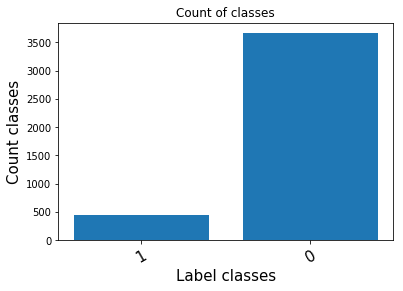

In [53]:
class_label = ['1', '0']  #it is defined the classes for the labels
count_one=sum(1 for item in labels if item==(1)) # it is count the label with class 1
count_zero=sum(1 for item in labels if item==(0))# it is count the label with class 0
counts_class=[count_one,count_zero] # it is creted a vector to plot the counts

plt.figure(21) #generate the plot 
plt.bar(class_label , counts_class)    #plot the classifiers vs f1 measures
#plt.yticks(num.arange(960, 990, step=1))
plt.xlabel('Label classes', fontsize=15)#generate the x label
plt.ylabel('Count classes', fontsize=15)#generate the y label
plt.xticks(classifier, fontsize=15, rotation=30) #rotate the labels in x
plt.title('Count of classes') #generate the title for the graph


One way to tackle the problem of class imbalance is using resampling of one class. In this case, it is necessary to oversamples  the class 1 until the number of samples of class 1 will be similar to class 0.


In [52]:
from sklearn.utils import resample  #library to resample the dataset
dataset_pre_processed_majority = dataset_pre_processed[dataset_pre_processed.y==0] #it is selected the dataset with the majority of samples
dataset_pre_processed_minority = dataset_pre_processed[dataset_pre_processed.y==1] #it is selected the dataset with the minority of samples

In [57]:
dataset_pre_processed_minority_upsampled = resample(dataset_pre_processed_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=count_zero,    # to match majority class
                                 random_state=0) # reproducible results

After to upsample the minority class, it is concatenated both classes and shuffle the data

In [60]:
dataset_pre_processed_upsample = pd.concat([dataset_pre_processed_minority_upsampled,dataset_pre_processed_majority ], axis=0)  #concatenate classes
dataset_shuffle_upsample = shuffle(dataset_pre_processed_upsample,random_state=0)   #function to shuffle the dataset
print(dataset_shuffle_upsample)

      age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
2239   45       2.0  0.000000           1.4          93.918          -42.7   
1206   60       2.0  0.000000           1.1          93.994          -36.4   
1364   27       6.0  0.000000           1.4          93.918          -42.7   
4089   25       1.0  0.190337          -3.4          92.431          -26.9   
1283   55       4.0  0.190337          -1.8          92.893          -46.2   
739    26       4.0  0.000000           1.1          93.994          -36.4   
556    38       1.0  0.000000           1.4          93.918          -42.7   
3107   25       2.0  0.190337          -1.1          94.767          -50.8   
1572   35       1.0  0.000000          -1.8          92.893          -46.2   
3946   26       2.0  0.190337          -2.9          92.201          -31.4   
2453   44       1.0  0.000000          -1.8          92.843          -50.0   
1486   38       1.0  0.000000          -2.9          92.963     

After these steps, it is possible to train a classifier with balance data

In [67]:
from sklearn.model_selection import train_test_split   #library tp split the data in training and testing
normalized_features_upsample=dataset_shuffle_upsample.iloc[:,0:50]  #The data is shuffle
target_upsample=dataset_shuffle_upsample.iloc[:,50] # it is extracted the target values
X_train_norm_upsample, X_test_norm_upsample, y_train_norm_upsample, y_test_norm_upsample = train_test_split(normalized_features_upsample,target_upsample , test_size = 0.27,random_state=0)   #function to split the data in training and testing

In [70]:
from sklearn.metrics import classification_report, confusion_matrix  #library to use confusion matrix and classification_report
from sklearn.svm import SVC  # library to use SVM 
svclassifier = SVC(kernel='linear',random_state=0)   #it will be used linear SVM
svclassifier1 =svclassifier.fit(X_train_norm_upsample,y_train_norm_upsample)    #it is trained SVM linear with training data
predict_svm_linear_testing=svclassifier1.predict(X_test_norm_upsample) #Function to predict the labels for testing dataset
print(classification_report(y_test_norm_upsample, predict_svm_linear_testing ))  #it is printed the results of thesvm linear clasifier



              precision    recall  f1-score   support

           0       0.62      0.26      0.37       960
           1       0.55      0.85      0.67      1021

   micro avg       0.56      0.56      0.56      1981
   macro avg       0.59      0.56      0.52      1981
weighted avg       0.58      0.56      0.52      1981



__PART 2__

Classify dataset B using four classifiers: k-NN, Support Vector Machine (with RBF kernel), Random Forests and simple Neural Networks (MLPs). The objective is to experiment with parameter selection in training classifiers and to compare the performance of these well- known classification methods.

__1. Preprocess the given data using the Z-score normalization on the data. Justify the choice of Z-score normalization here, as opposed to min-max normalization. Why do you need normalization in general? Justify why you would normally split the test and training set randomly. What is the distribution of the +1,-1 classes in the dataset?[5]__

In [1]:
import pandas as pd   #import pandas library with the name pd
import matplotlib.pyplot as plt #import matplotlib library with the name plt
import numpy as num     #import the library numpy with the name num
import matplotlib.pyplot as plt   # import matplotlib with the name plt 
import matplotlib                 #import matplotlib
import warnings                        #import warnings
warnings.filterwarnings('ignore')      #hide warnings



In [2]:
path = 'DataDNA.csv'  #path to extract data
ws=pd.read_csv(path,delimiter=",")  #varible where the data is stored
print(ws)

      1  2  1.1  2.1  1.2  2.2  3  3.1  3.2  3.3  ...   3.8  2.19  3.9  4.6  \
0     3  3    4    2    1    2  2    4    3    2  ...     1     4    3    4   
1     4  1    4    4    4    4  1    1    2    1  ...     1     2    1    1   
2     1  4    1    1    3    3  4    4    3    4  ...     1     3    3    4   
3     3  4    4    3    1    1  4    4    4    1  ...     3     1    3    2   
4     3  2    3    1    2    3  4    3    1    4  ...     2     2    2    3   
5     4  2    1    4    2    4  4    4    2    3  ...     4     3    3    4   
6     3  3    4    3    1    3  4    3    4    1  ...     4     2    2    1   
7     1  3    4    3    3    1  1    4    2    1  ...     2     1    3    2   
8     1  3    1    1    3    1  1    2    1    1  ...     2     4    2    2   
9     4  4    3    4    2    1  1    2    2    2  ...     4     2    2    4   
10    4  2    2    1    2    3  3    4    3    1  ...     2     3    4    2   
11    2  2    3    3    4    3  3    4    3    4  ..

In the next lines of code is separated the features and the labels 

In [3]:
features1=ws.iloc[:,0:57]              #it is selected the features 
labels1=ws.iloc[:,57]                  #it is selected the labels
features1_dr=ws.iloc[:,0:57]           #it is selected the features to use in feature selection
columnsNamesArr2 = features1.columns.values        #this vector has the names of each attribute 
length=features1.shape[1]              #it is obtained the length of the vector


We are interested in analyzing what is the distribution for each feature. For this reason, it is plotted histograms for each feature

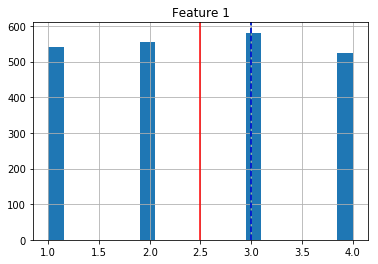

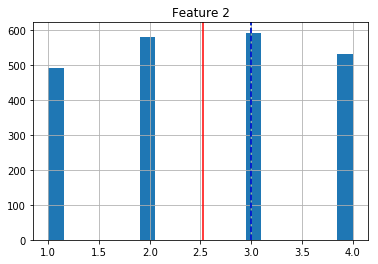

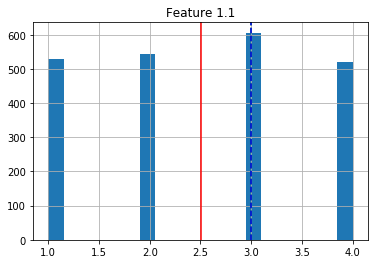

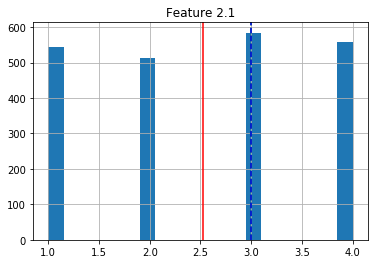

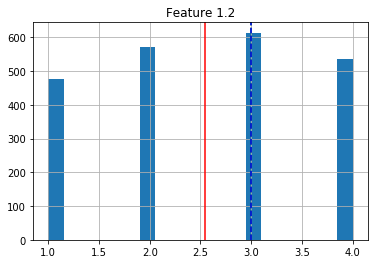

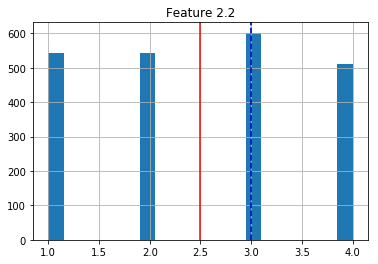

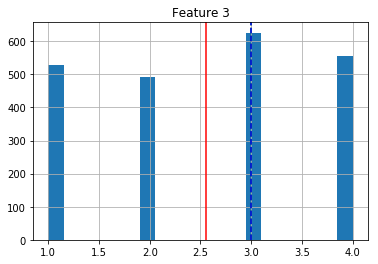

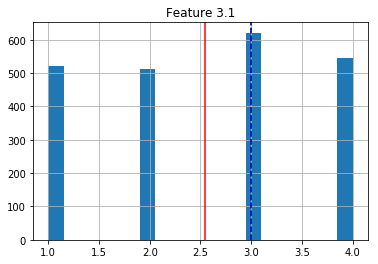

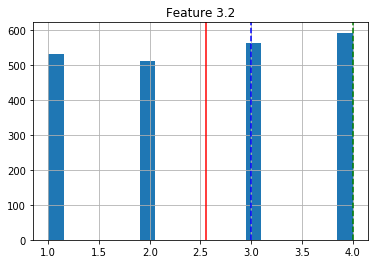

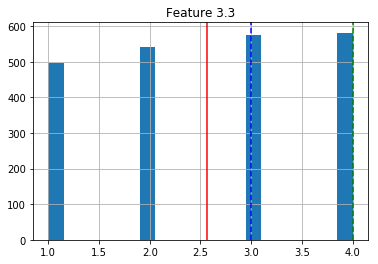

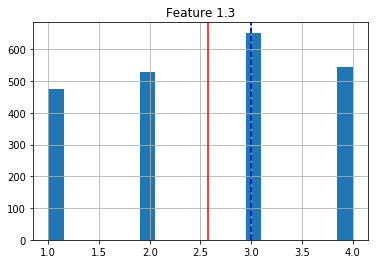

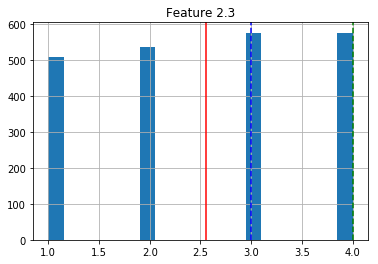

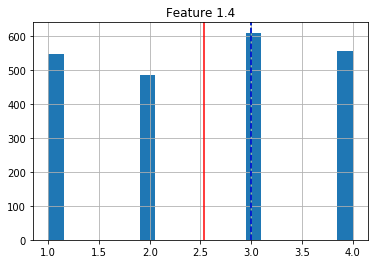

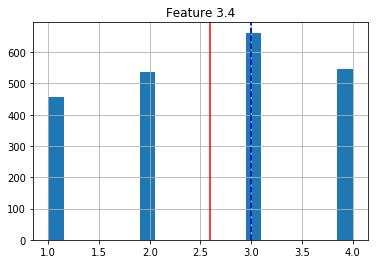

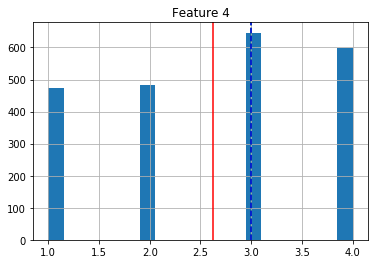

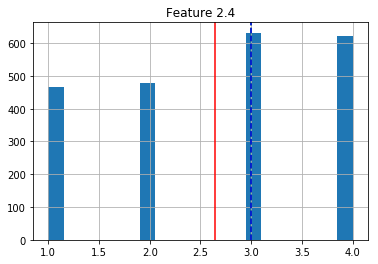

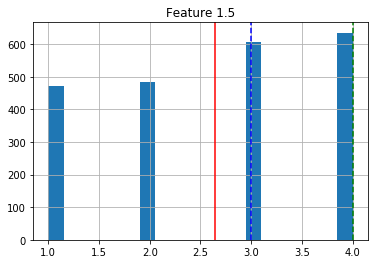

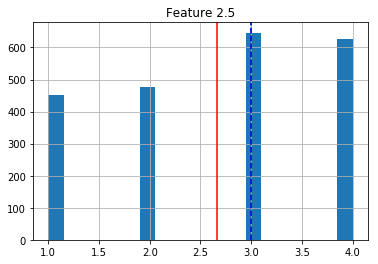

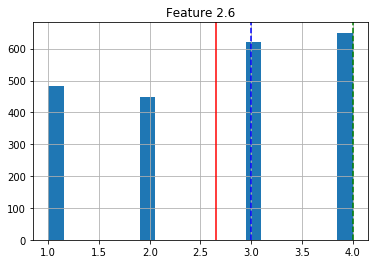

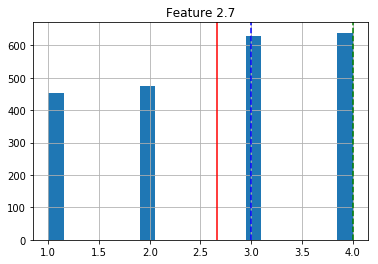

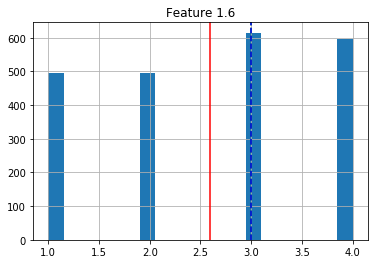

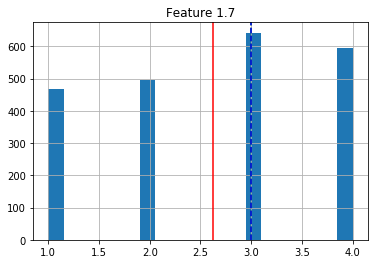

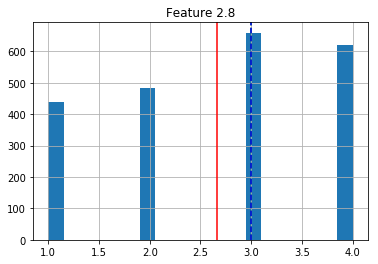

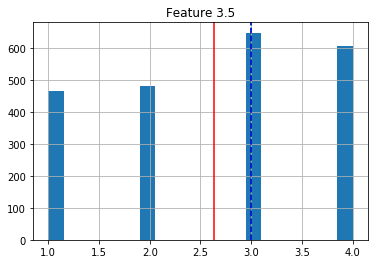

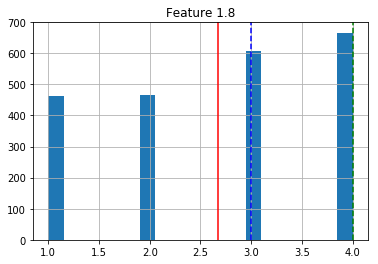

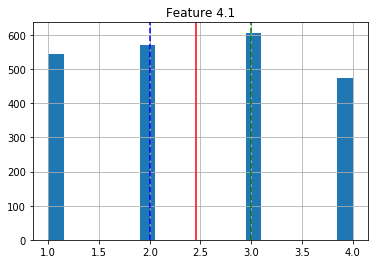

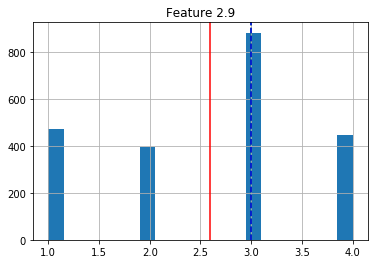

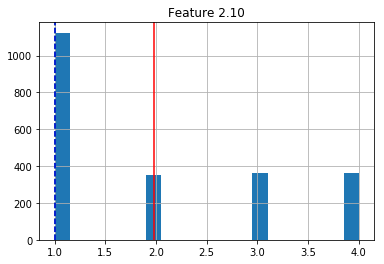

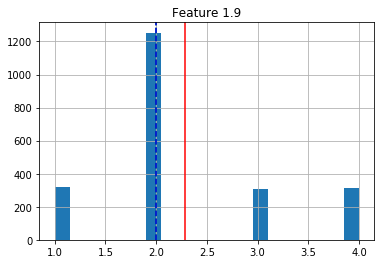

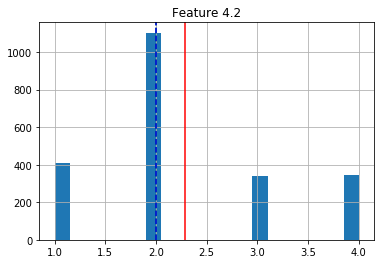

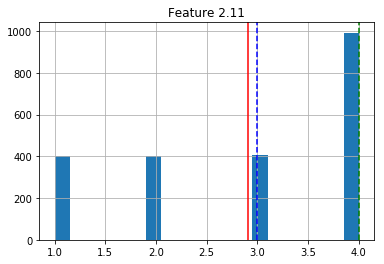

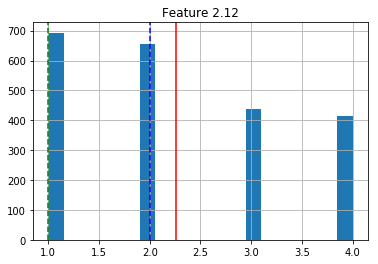

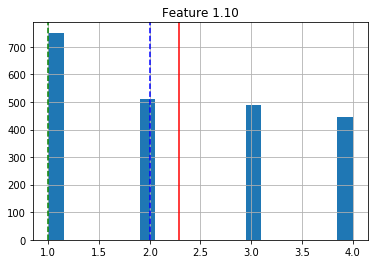

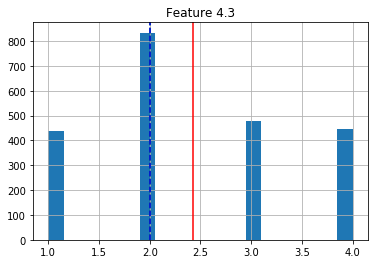

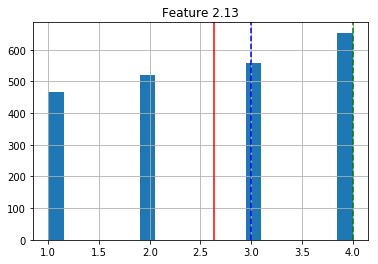

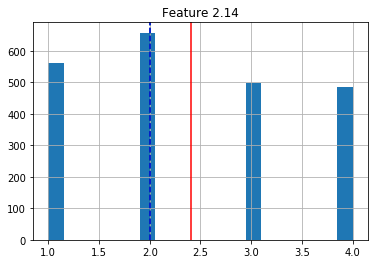

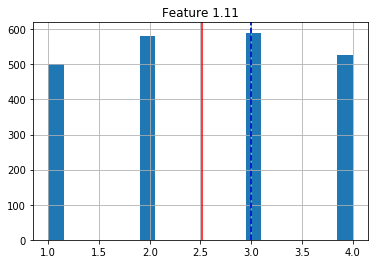

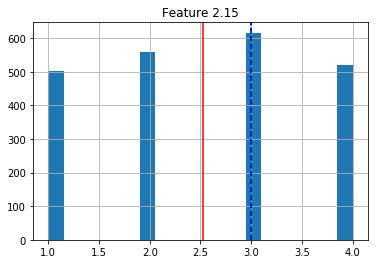

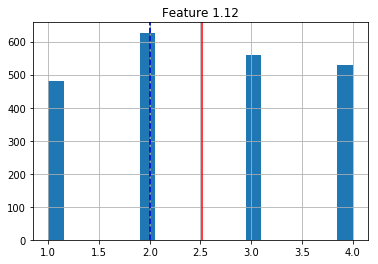

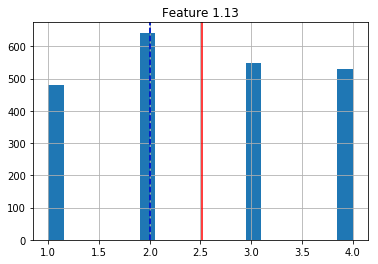

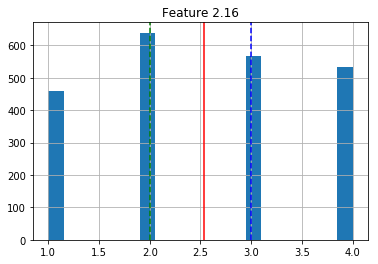

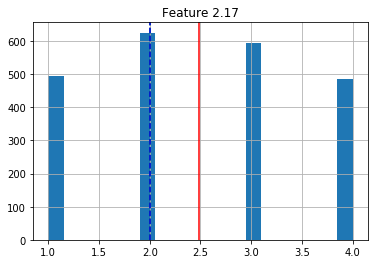

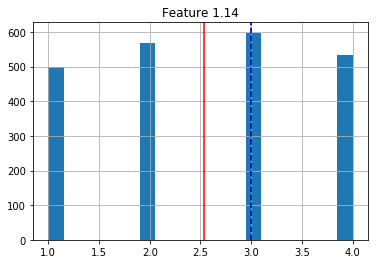

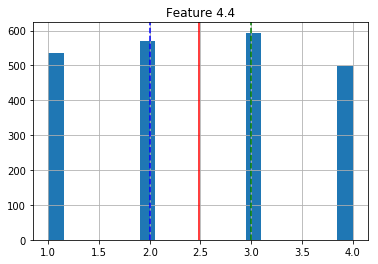

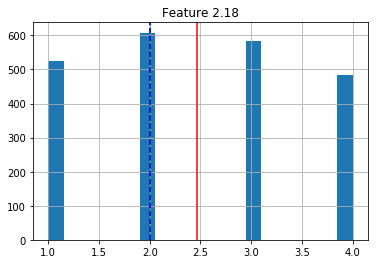

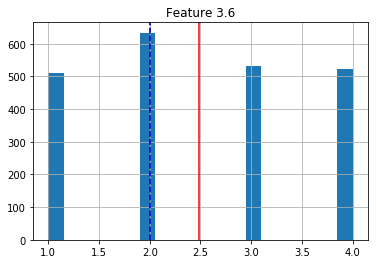

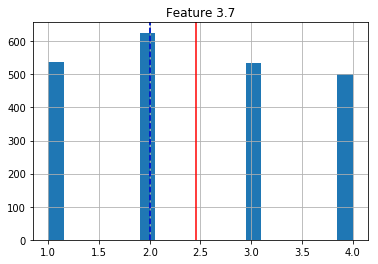

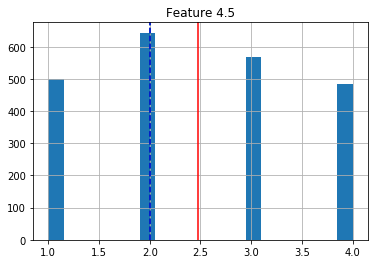

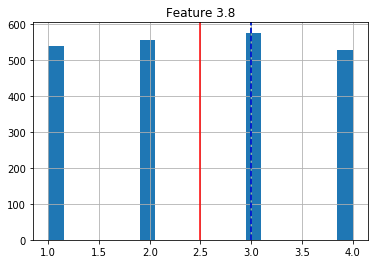

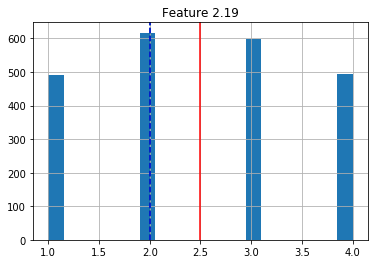

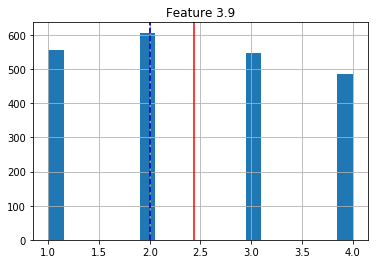

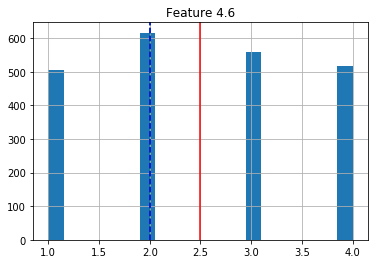

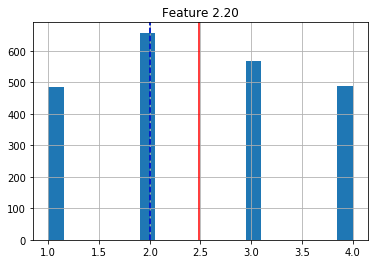

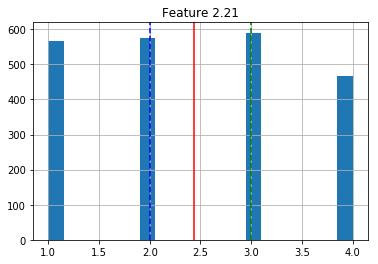

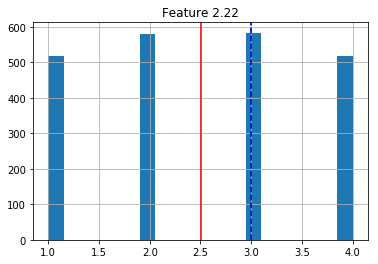

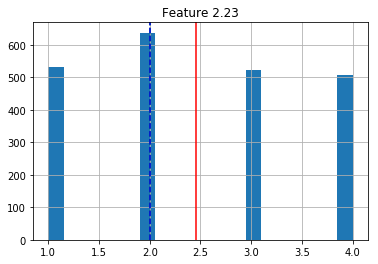

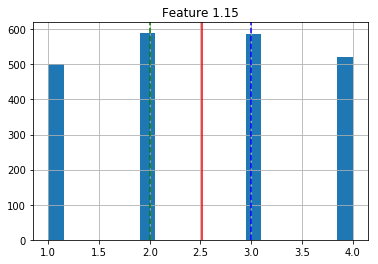

In [4]:
for i in range (0,length):       #for loop to plot the histograms for numerical data
#d=c.iloc[:,1]
    plt.figure(i)                          #Create new plot
    am_hist=features1.iloc[:,i].hist(bins=20)      # Plot a histogram of each feature
    meanr=features1.iloc[:,i].mean()               #Find the mean of each feature
    modar=features1.iloc[:,i].mode().get_values()[0] #Find the mode of each feature
    medianr=features1.iloc[:,i].median()            #Find the median of each feature
    plt.title('Feature %s'%(columnsNamesArr2[i]))            #Title for each histogram
    am_hist.axvline(meanr,color='r',linestyle='-')  #Draw a line in the mean
    am_hist.axvline(modar,color='g',linestyle='--') #Draw a line in the mode
    am_hist.axvline(medianr,color='b',linestyle='--') #Draw a line in the median

__Justify the choice of Z-score normalization here, as opposed to min-max normalization. Why do you need normalization in general?__

As we can see in the histograms plotted in the previous graphs, there are ranges where values do not exist. If we normalized the data using min-max normalization, most of the data in the middle of the ranges is not normalized in a proper way. Due to the fact that the values in the boundaries can be seen as outliers. For this reason, min-max normalization is not a good solution for this dataset. In contrast, standarization is not affected by outliers. In addition, we can see that all of the features are in the range of 1 to 4. Therefore, a good way to amplify the squished data is to use standard normalization. In this case, the observed values are scaled taking into account the mean and the variance of the dataset. The resultant value of a sample after standard normalization indicates how far is the sample from the mean, and how many standard deviation times is from this mean. If we plot histograms using less bins, we can see that the majority of the features follow a normal distribution. For this reason, the standard normalization is a good way to avoid squished data 

In [5]:
from sklearn.preprocessing import StandardScaler
standard_normalization =StandardScaler()
standard_normalization = standard_normalization.fit(features1)
normalized_features_2 = standard_normalization.transform(features1)
normalized_features_2 = pd.DataFrame(normalized_features_2)


__Justify why you would normally split the test and training set randomly__

Generally, the samples to build the training and testing dataset have to be selected randomly to not have a bias model. At the beginning, it is necessary to shuffle the data or to choose randomly the samples to create the training and testing set. The dataset has been shuffle before. In the following lines of code, it is created training and testing dataset.

After applying standard normalization, it is shuffle the data to avoid bias the model.

In [6]:
from sklearn.utils import shuffle       #library to shuffle the dataset
normalized_dna = pd.concat([normalized_features_2,labels1 ], axis=1) #it concatenates the normalized features and labels
print(normalized_dna )
dataset_shuffle = shuffle(normalized_dna,random_state=0)   #function to shuffle the dataset
features1=dataset_shuffle.iloc[:,0:57]  #features of the model
target2=dataset_shuffle.iloc[:,57]      #labels of the model
print(features1)
print(target2)

             0         1         2         3         4         5         6  \
0     0.458674  0.432785  1.359670 -0.471124 -1.432148 -0.448403 -0.495411   
1     1.364896 -1.408017  1.359670  1.316628  1.342560  1.370856 -1.396493   
2    -1.353769  1.353186 -1.373342 -1.365001  0.417657  0.461226  1.306754   
3     0.458674  1.353186  1.359670  0.422752 -1.432148 -1.358032  1.306754   
4     0.458674 -0.487616  0.448666 -1.365001 -0.507245  0.461226  1.306754   
5     1.364896 -0.487616 -1.373342  1.316628 -0.507245  1.370856  1.306754   
6     0.458674  0.432785  1.359670  0.422752 -1.432148  0.461226  1.306754   
7    -1.353769  0.432785  1.359670  0.422752  0.417657 -1.358032 -1.396493   
8    -1.353769  0.432785 -1.373342 -1.365001  0.417657 -1.358032 -1.396493   
9     1.364896  1.353186  0.448666  1.316628 -0.507245 -1.358032 -1.396493   
10    1.364896 -0.487616 -0.462338 -1.365001 -0.507245  0.461226  0.405671   
11   -0.447547 -0.487616  0.448666  0.422752  1.342560  0.461226

__What is the distribution of the +1,-1 classes in the dataset?__

The following lines of code are useful to plot the distribution of the classes of the dataset.

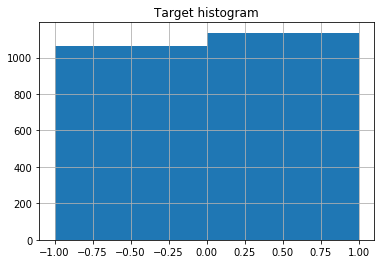

In [7]:
plt.figure(12)                          #Create new plot
hist=target2.hist(bins=2)      # Plot a histogram of each feature
meanr=target2.mean()               #Find the mean of each feature
modar=target2.mode().get_values()[0] #Find the mode of each feature
medianr=target2.median()            #Find the median of each feature
plt.title('Target histogram')            #Title for each histogram
am_hist.axvline(meanr,color='r',linestyle='-')  #Draw a line in the mean
am_hist.axvline(modar,color='g',linestyle='--') #Draw a line in the mode
am_hist.axvline(medianr,color='b',linestyle='--') #Draw a line in the median

As we can see, the number of samples are almost balance for each class. For this reason, we can conclude that it is not necessary to apply oversampling. 

__2. Parameter Selection:__

(a) For k-NN you need to evaluate the best value k to use. Using 5-fold cross validation on the training set evaluate k-NN on the values k=[1, 3, 5, 7, , 31]. Plot a figure that shows the relationship between the accuracy and the parameter k.
Report the best k in terms of classification accuracy. Explain why you didnt evaluate directly on the test set [7.5].

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score              #function to calculate f1-score is imported
from sklearn.metrics import accuracy_score        #function to calculate accuracy is imported
from sklearn.neighbors import KNeighborsClassifier #library to use k nearest neighbor
plt.figure(1)
number_neighbors_plot_2=[1, 3, 5, 7, 9, 11,13,15,17,19,21,23,25,27,29,31,50,100]#hyperparameters to test in the model
total_number_neighbors_test=len(number_neighbors_plot_2)     #It is obtained the length of the vector
accuracy_number_of_neighbors_testing_knn_2 = np.zeros(total_number_neighbors_test)  #It is created an array of 1 dimension to store the accuracy for each value of the number of neighbors using cv=5

number_neighbors_2 = {"n_neighbors": [1, 3, 5, 7, 9, 11,13,15,17,19,21,23,25,27,29,31,50,100]}  # it is defined the hyperparameters to tune
number_neighbors_plot_2=[1, 3, 5, 7, 9, 11,13,15,17,19,21,23,25,27,29,31,50,100] # it is defined the hyperparameters to tune and plot
pointer_parameter=0
for parameter in number_neighbors_2["n_neighbors"]:    #for loop to evaluate the model with different number of neighbors
    model_knn_2 =  KNeighborsClassifier(n_neighbors=parameter)  #The knn is declared to create the model
    scores = cross_val_score(model_knn_2, features1, target2,cv=5)  #It is built the model with training data
    accuracy_number_of_neighbors_testing_knn_2[pointer_parameter]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
    pointer_parameter=pointer_parameter+1  #pointer to move within the array of 3 dimensions
    
print( accuracy_number_of_neighbors_testing_knn_2)  


[0.73849095 0.74985771 0.76260153 0.76535052 0.7662503  0.76079159
 0.74624713 0.74397749 0.74625643 0.74988143 0.74260145 0.74351261
 0.74533493 0.7339599  0.73077496 0.73578427 0.71167678 0.68076142]


<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


([<matplotlib.axis.XTick at 0x1c2517a8ba8>,
 <a list of 20 Text xticklabel objects>)

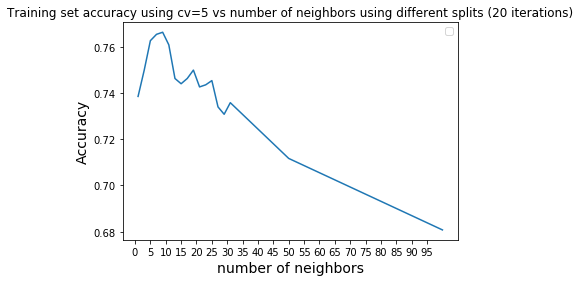

In [9]:
plt.figure(1)   # plot figure
plt.plot(number_neighbors_plot_2,accuracy_number_of_neighbors_testing_knn_2)
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('number of neighbors', fontsize = 14) #function to plot the label in x
plt.title('Training set accuracy using cv=5 vs number of neighbors using different splits (20 iterations)') #this functions shows the legends  
plt.legend() #this functions shows the legends  
plt.xticks(num.arange(0, 100, step=5))


As we can see in the figure above, the optimal number of neighbors is approximately 10. When we are using k fold cross validation, every iteration is evaluated the accuracy in 1 fold using the model created by the rest of the folds. K fold cross validation is useful because the model learns for all of the features, and at the same time is evaluated the performance. 

__b) For the RBF kernel SVM, there are two parameters to be decided: the soft margin penalty term "c" and the kernel width parameter "sigma". Again use 5-fold cross validation on the training set to select the parameter "c" from the set [0.1, 0.5, 1, 2, 5, 10, 20, 50] and select the parameter "sigma" from the set [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]. Report the best parameters in terms of classication accuracy including plotting the ROC curves [7.5].__

In [10]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score              #function to calculate f1-score is imported
from sklearn.metrics import accuracy_score        #function to calculate accuracy is imported
from sklearn import svm    #import svm

parameter_c={"C": [0.1,0.5,1,2,5,10,20,50]  }
parameter_c_plot=[0.1,0.5,1,2,5,10,20,50]                         #hyperparameters to test in the model
total_number_parameters_c=len(parameter_c_plot)                   #It is obtained the length of the vector

parameter_gamma={"gamma":[0.01,0.05,0.1,0.5,1,2,5,10] }
parameter_gamma_plot=[0.01,0.05,0.1,0.5,1,2,5,10]                 #hyperparameters to test in the model
total_number_parameters_gamma=len(parameter_gamma_plot)           #It is obtained the length of the vector
accuracy_c_gamma= np.zeros((total_number_parameters_c,total_number_parameters_gamma))  #It is created an array of 2 dimensions to store the accuracy for each value of c and gamma using cv=5

pointer_c=0
pointer_gamma=0

for parameter1 in parameter_c["C"]:    #for loop to evaluate the model with different C
    for parameter2 in parameter_gamma["gamma"]:    #for loop to evaluate the model with different gamma
        rbf_svc = svm.SVC(kernel='rbf',C=parameter1, gamma=parameter2) #it is defined the svm with radial basis function
        scores = cross_val_score(rbf_svc, features1, target2, cv=5)  #It is built the model with training data
        accuracy_c_gamma[pointer_c][pointer_gamma]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_gamma=pointer_gamma+1  #pointer to move within the array of 2 dimensions
    pointer_gamma=0
    pointer_c=pointer_c+1
print( accuracy_c_gamma)  

[[0.84813691 0.5229634  0.51659871 0.51659871 0.51659871 0.51659871
  0.51659871 0.51659871]
 [0.87267419 0.83128667 0.59299048 0.55070109 0.54615253 0.54114941
  0.53751614 0.53751614]
 [0.886323   0.87175063 0.67712401 0.61572196 0.61208352 0.60389755
  0.59252975 0.59252975]
 [0.8981412  0.87902958 0.69803422 0.61981391 0.61435729 0.60389755
  0.59252975 0.59252975]
 [0.90541705 0.87857503 0.69803422 0.61981391 0.61435729 0.60389755
  0.59252975 0.59252975]
 [0.90678484 0.87857503 0.69803422 0.61981391 0.61435729 0.60389755
  0.59252975 0.59252975]
 [0.90632719 0.87857503 0.69803422 0.61981391 0.61435729 0.60389755
  0.59252975 0.59252975]
 [0.90632719 0.87857503 0.69803422 0.61981391 0.61435729 0.60389755
  0.59252975 0.59252975]]


([<matplotlib.axis.XTick at 0x1c2514fc3c8>,
 <a list of 10 Text xticklabel objects>)

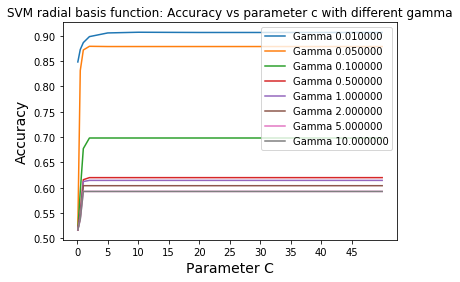

In [11]:
plt.figure(1)   # plot figure
for i in range (0,total_number_parameters_gamma):       #for loop to plot the histograms for numerical data
    plt.plot(parameter_c_plot,accuracy_c_gamma[:,i],label = 'Gamma %f' %parameter_gamma_plot[i])
    
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Parameter C', fontsize = 14) #function to plot the label in x
plt.title('SVM radial basis function: Accuracy vs parameter c with different gamma') #this functions shows the legends  
plt.legend() #this functions shows the legends  
plt.xticks(num.arange(0, 50, step=5))

As we can see in the figure above, the best accuracy is reached when the value of gamma is 0.01 and the parameter C=5. 

In [12]:
features11=features1.values   #Transforms dataframe to numpy
target22=target2.values       #Transforms dataframe to numpy


Text(0.5, 0, 'FALSE POSITIVE RATE')

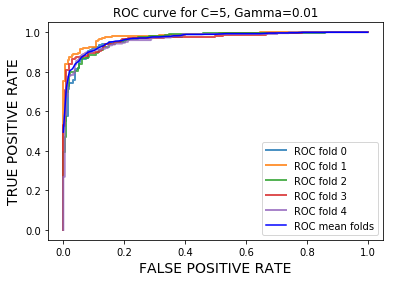

In [13]:
from sklearn.model_selection import StratifiedKFold   #Library k fold cross validation
from sklearn.metrics import roc_curve, auc     #library to create roc curve
from scipy import interp  #function to interpolates values
mean_fpr = np.linspace(0, 1, 100) #it is created a space between 0 to 1 with 100 elements
tprs = []    #array to record fpr and tpr
cv = StratifiedKFold(n_splits=5)  #cross validation
rbf_svc = svm.SVC(kernel='rbf',C=5, gamma=0.01,probability=True) #Best model selected
i=0  #variable to plot labels
for train, test in cv.split(features11, target22):     #for loop to analyze each fold
    probas= rbf_svc.fit(features11[train],target22[train]).predict_proba(features11[test])  #it calculates the probabilities for the testing set
    fpr, tpr, thresholds = roc_curve(target22[test], probas[:, 1])  # it finds the roc values
    plt.figure(10)  # it is ploted a new figure
    plt.plot(fpr, tpr, lw=2, alpha=0.8,label='ROC fold %d'%i)  # it is plotted the line of the roc curve
    tprs.append(interp(mean_fpr, fpr, tpr)) #it stores each value for each fold to obtain the average roc
    i=i+1
#print(tprs)
mean_tpr = np.mean(tprs, axis=0)  #it is find the average of the values
plt.plot(mean_fpr, mean_tpr, color='b',label='ROC mean folds')   #it is plotted the mean roc curve
plt.legend(loc="lower right")
plt.title('ROC curve for C=5, Gamma=0.01') #this functions shows the legends 
plt.ylabel('TRUE POSITIVE RATE', fontsize = 14)    #function to plot the label in y
plt.xlabel('FALSE POSITIVE RATE', fontsize = 14) #function to plot the label in x

__3. Train (at least) six classifiers and report the results:__

__a) Classify the test set using k-NN, SVM, Random Forests and Neural Networks. Use the chosen parameters from the parameter selection process in question 2 for k-NN and SVM. For the next two classifiers use the default setups listed at the end for Random Forests and Neural Networks__

In this section, it has been obtained the accuracy for the testing set for KNN, SVM, Random forest and neural networks. For KNN and SVM, it has been used the optimal hyperparameters selected. For Random forest and neural network, it has been used the default hyperparameters.

__RANDOM FOREST__

In [14]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest_3 = RandomForestClassifier(random_state=0) #The random forest function is declared to create the modelmodel_random_forest = model_random_forest.fit(X_train, y_train)  #It is built the model with training data
scores = cross_val_score(model_random_forest_3, features1, target2, cv=5)  #It is built the model with training data
accuracy=scores.mean()  # it is obtained the mean of accuracy
print(model_random_forest_3)
print('Accuracy random forest test set %f'%accuracy)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Accuracy random forest test set 0.943616


__NEURAL NETWORK__

In [15]:
from sklearn.neural_network import MLPClassifier
model_nn_3 = MLPClassifier(random_state=0) #The neural network function is declared to create the model
scores = cross_val_score(model_nn_3, features1, target2, cv=5)  #It is built the model with training data
accuracy=scores.mean()  # it is obtained the mean of accuracy
print(model_nn_3)
print('Accuracy neural network test set %f'%accuracy)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy neural network test set 0.911339


__SVM radial basis function__

In [16]:
rbf_svc = svm.SVC(kernel='rbf',C=5, gamma=0.01) #Best model selected
scores = cross_val_score(rbf_svc, features1, target2, cv=5)  #It is built the model with training data
accuracy=scores.mean()  # it is obtained the mean of accuracy
print(rbf_svc)
print('Accuracy SVM radial basis function %f'%accuracy)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy SVM radial basis function 0.905417


__KNN optimal hyperameter__

In [17]:
model_knn_2 =  KNeighborsClassifier(n_neighbors=10)  #The knn is declared to create the model
scores = cross_val_score(model_knn_2, features1, target2, cv=5)  #It is built the model with training data
accuracy=scores.mean()  # it is obtained the mean of accuracy
print(model_knn_2 )
print('Accuracy KNN %f'%accuracy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')
Accuracy KNN 0.726237


__(b) For the fifth and sixth classifiers, you should explore the parameters of the Random Forests and Neural Network models to devise your own classifier instance that does better than the other methods. For example, you could consider a deeper neural network with multiple layers, use different optimization/solver algorithms, you could modify the Random Forests using different parameter settings for depth and number of trees or enable boosting. Play around with options and choose a setting for RFs and NNs that performs better [10].__

__RANDOM FOREST__

To establish the best hyperparameters to obtain the best accuracy in the present report, it has been proved several number of estimators and different depth of the trees in two scenarios when bootstrap is true and false 

SCENARIO 1 with BOOTSTRAP=TRUE

In [18]:

parameter_n_estimator={"n_estimators": [5,10,15,20,30,40,50,70,100,150,300,500,1000]  }
parameter_n_estimator_plot=[5,10,15,20,30,40,50,70,100,150,300,500,1000]       #hyperparameters to test in the model
total_number_parameters_n_estimator=len(parameter_n_estimator_plot)         #It is obtained the length of the vector

parameter_max_depth={"max_depth": [5,10,15,20,30,50,100,150,500,1000]  }
parameter_max_depth_plot= [5,10,15,20,30,50,100,150,500,1000]                 #hyperparameters to test in the model
total_number_parameters_max_depth=len(parameter_max_depth_plot)           #It is obtained the length of the vector

accuracy_estimators_maxdepth= np.zeros((total_number_parameters_n_estimator,total_number_parameters_max_depth))  #It is created an array of 2 dimensions to store the accuracy for the number of estimators and the depth of the tree
cv = StratifiedKFold(n_splits=5)  #it is defined the number of folds

pointer_n_estimator=0
pointer_max_depth=0
for parameter_rf in parameter_n_estimator["n_estimators"]:    #for loop to evaluate the model with different number of estimators
    for parameter2_rf in parameter_max_depth["max_depth"]:    #for loop to evaluate the model with different max depth of the trees
        model_random_forest = RandomForestClassifier(n_estimators=parameter_rf,max_depth=parameter2_rf,random_state=0,bootstrap=True) #The random forest function is declared to create the model
        scores = cross_val_score(model_random_forest, features1, target2, cv=5)  #It is built the model with training data
        accuracy_estimators_maxdepth[pointer_n_estimator][pointer_max_depth]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_max_depth=pointer_max_depth+1  #pointer to move within the array of 2 dimensions
    pointer_max_depth=0
    pointer_n_estimator=pointer_n_estimator+1
        
        


([<matplotlib.axis.XTick at 0x1c250a3a828>,
 <a list of 10 Text xticklabel objects>)

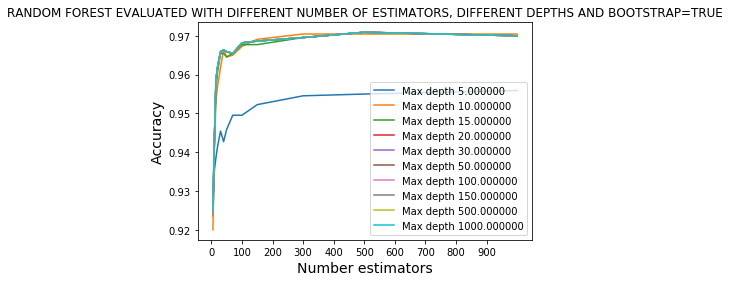

In [19]:
plt.figure(1)   # plot figure
for i in range (0,total_number_parameters_max_depth):       #for loop to plot the histograms for numerical data
    plt.plot(parameter_n_estimator_plot,accuracy_estimators_maxdepth[:,i],label = 'Max depth %f' %parameter_max_depth_plot[i])
    
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number estimators', fontsize = 14) #function to plot the label in x
plt.title('RANDOM FOREST EVALUATED WITH DIFFERENT NUMBER OF ESTIMATORS, DIFFERENT DEPTHS AND BOOTSTRAP=TRUE') #this functions shows the legends  
plt.legend() #this functions shows the legends  
plt.xticks(num.arange(0, 1000, step=100))

SCENARIO 2 with BOOTSTRAP=FALSE

In [20]:

parameter_n_estimator={"n_estimators": [5,10,15,20,30,40,50,70,100,150,300,500,1000]  }
parameter_n_estimator_plot=[5,10,15,20,30,40,50,70,100,150,300,500,1000]       #hyperparameters to test in the model
total_number_parameters_n_estimator=len(parameter_n_estimator_plot)         #It is obtained the length of the vector

parameter_max_depth={"max_depth": [5,10,15,20,30,50,100,150,500,1000]  }
parameter_max_depth_plot= [5,10,15,20,30,50,100,150,500,1000]                 #hyperparameters to test in the model
total_number_parameters_max_depth=len(parameter_max_depth_plot)           #It is obtained the length of the vector

accuracy_estimators_maxdepth= np.zeros((total_number_parameters_n_estimator,total_number_parameters_max_depth))  #It is created an array of 2 dimensions to store the accuracy for the number of estimators and the depth of the tree

cv = StratifiedKFold(n_splits=5)   #it is defined the number of folds

pointer_n_estimator=0
pointer_max_depth=0
for parameter_rf in parameter_n_estimator["n_estimators"]:    #for loop to evaluate the model with different number of estimators
    for parameter2_rf in parameter_max_depth["max_depth"]:    #for loop to evaluate the model with different max depth of the trees
        model_random_forest = RandomForestClassifier(n_estimators=parameter_rf,max_depth=parameter2_rf,random_state=0,bootstrap=False) #The random forest function is declared to create the model
        scores = cross_val_score(model_random_forest, features1, target2, cv=5)  #It is built the model with training data
        accuracy_estimators_maxdepth[pointer_n_estimator][pointer_max_depth]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_max_depth=pointer_max_depth+1  #pointer to move within the array of 2 dimensions
    pointer_max_depth=0
    pointer_n_estimator=pointer_n_estimator+1

([<matplotlib.axis.XTick at 0x1c24e58cf60>,
 <a list of 10 Text xticklabel objects>)

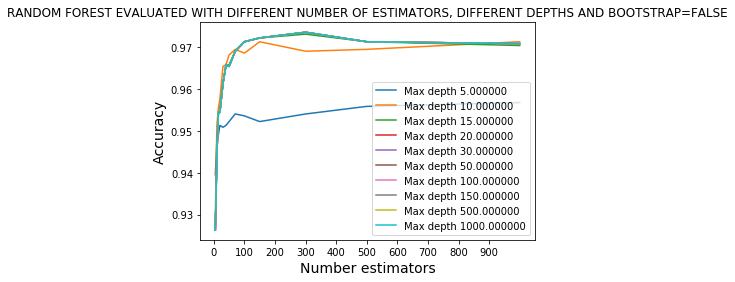

In [21]:
plt.figure(1)   # plot figure
for i in range (0,total_number_parameters_max_depth):       #for loop to plot the histograms for numerical data
    plt.plot(parameter_n_estimator_plot,accuracy_estimators_maxdepth[:,i],label = 'Max depth %f' %parameter_max_depth_plot[i])
    
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number estimators', fontsize = 14) #function to plot the label in x
plt.title('RANDOM FOREST EVALUATED WITH DIFFERENT NUMBER OF ESTIMATORS, DIFFERENT DEPTHS AND BOOTSTRAP=FALSE') #this functions shows the legends  
plt.legend() #this functions shows the legends  
plt.xticks(num.arange(0, 1000, step=100))

As we can see in the figures above, when bootstrap is deactivated the accuracy starts to decrease after 300 estimators as we can see in the figure above. This behavior does not happen when bootstrap is true. 

If we analyze the graph where bootstrap=true, we can see that after 300 estimators the accuracy is almost the same. For this reason, it has been selected 300 estimators as the optimal value. In addition, we can see that the curves after the max_depth>10 are very similar. Therefore, it has been selected 15 as the optimal depth of the trees. While greater is the value of max_depth and the number of estimators, the algorithm will take more time to train and test samples. Thus, it has been selected the minimun values for depth_tree and number of estimators to reach the best accuracy and consume the less time.

Final selection Bootstrap=true, number of estimators=300 and max_depth=15

__NEURAL NETWORK__

In the following section, it is analyzed the accuracy of the neural network changing different parameters of this such as activation fuction, algorithm, number of neurons and number of layers. 

Scenario 1: Changing the number of neurons and evaluating each activation function

In [22]:

parameter_activation={"activation": ['identity', 'logistic', 'tanh', 'relu']  }
parameter_activation_plot=['identity', 'logistic', 'tanh', 'relu']       #hyperparameters to test in the model
total_number_parameters_activation=len(parameter_activation_plot)         #It is obtained the length of the vector

number_neurons = {"hidden_layer_sizes": [5,10,15,20,25,50,100]}
number_neurons_plot=[5,10,15,20,25,50,100]

total_number_neurons=len(number_neurons_plot)           #It is obtained the length of the vector

accuracy_activation_neurons= np.zeros((total_number_parameters_activation,total_number_neurons))  #It is created an array of 2 dimensions to store the accuracy for the number of neurons using different activation functions
cv = StratifiedKFold(n_splits=5)   #it is defined the number of folds

pointer_activation=0
pointer_neurons=0
for parameter_act in parameter_activation["activation"]:    #for loop to evaluate the model with different activation functions
    for parameter2_neurons in number_neurons["hidden_layer_sizes"]:    #for loop to evaluate the model with different number of neurons
        model_nn = MLPClassifier(hidden_layer_sizes=(parameter2),activation=parameter_act) #The neural network function is declared to create the model
        scores = cross_val_score(model_nn , features1, target2, cv=5)  #It is built the model with training data
        accuracy_activation_neurons[pointer_activation][pointer_neurons]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_neurons=pointer_neurons+1  #pointer to move within the array of 2 dimensions
    pointer_neurons=0
    pointer_activation=pointer_activation+1


([<matplotlib.axis.XTick at 0x1c250a990b8>,
 <a list of 20 Text xticklabel objects>)

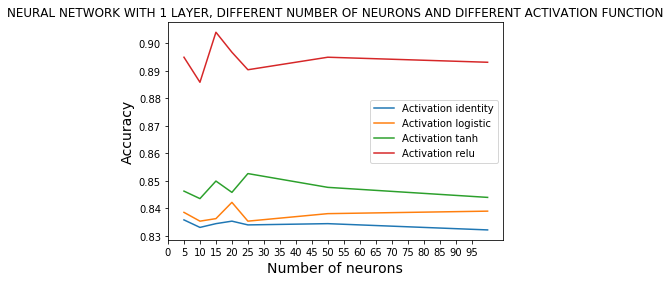

In [23]:
plt.figure(1)   # plot figure
for i in range (0,total_number_parameters_activation):       #for loop to plot the histograms for numerical data
    plt.plot(number_neurons_plot,accuracy_activation_neurons[i,:],label = 'Activation %s' %parameter_activation_plot[i])
    
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of neurons', fontsize = 14) #function to plot the label in x
plt.title('NEURAL NETWORK WITH 1 LAYER, DIFFERENT NUMBER OF NEURONS AND DIFFERENT ACTIVATION FUNCTION') #this functions shows the legends  
plt.legend() #this functions shows the legends  
plt.xticks(num.arange(0, 100, step=5))

As we can see in the figure above, the activation function RELU reaches the best accuracy. In this case, the activation function RELU will be keep constant, and we will try different solvers.

In [26]:

parameter_solver={"solver": ['lbfgs', 'sgd', 'adam']  }
parameter_solver_plot=['lbfgs', 'sgd', 'adam']                        #hyperparameters to test in the model
total_number_solvers=len(parameter_solver_plot)         #It is obtained the length of the vector

number_neurons = {"hidden_layer_sizes": [5,10,15,20,25,50,100]}
number_neurons_plot=[5,10,15,20,25,50,100]

total_number_neurons=len(number_neurons_plot)           #It is obtained the length of the vector

accuracy_solvers_neurons= np.zeros((total_number_solvers,total_number_neurons))  #It is created an array of 2 dimensions to store the accuracy for the number of neurons using different solvers
cv = StratifiedKFold(n_splits=5)   #it is defined the number of folds

pointer_solvers=0
pointer_neurons=0
for parameter_sol in parameter_solver["solver"]:    #for loop to evaluate the model with different solvers
    for parameter2_neurons in number_neurons["hidden_layer_sizes"]:    #for loop to evaluate the model with different number of neurons
        model_nn = MLPClassifier(hidden_layer_sizes=(parameter2),activation='relu',solver=parameter_sol ) #The neural network function is declared to create the model
        scores = cross_val_score(model_nn , features1, target2, cv=5)  #It is built the model with training data
        accuracy_solvers_neurons[pointer_solvers][pointer_neurons]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_neurons=pointer_neurons+1  #pointer to move within the array of 2 dimensions
    pointer_neurons=0
    pointer_solvers=pointer_solvers+1

([<matplotlib.axis.XTick at 0x1c251611438>,
 <a list of 20 Text xticklabel objects>)

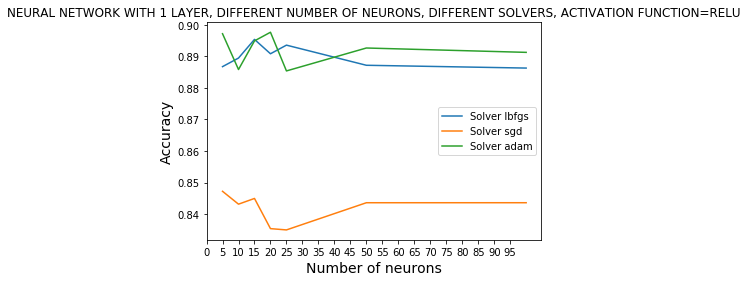

In [27]:
plt.figure(1)   # plot figure
for i in range (0,total_number_solvers):       #for loop to plot the histograms for numerical data
    plt.plot(number_neurons_plot,accuracy_solvers_neurons[i,:],label = 'Solver %s' %parameter_solver_plot[i])
    
plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of neurons', fontsize = 14) #function to plot the label in x
plt.title('NEURAL NETWORK WITH 1 LAYER, DIFFERENT NUMBER OF NEURONS, DIFFERENT SOLVERS, ACTIVATION FUNCTION=RELU') #this functions shows the legends  
plt.legend() #this functions shows the legends  
plt.xticks(num.arange(0, 100, step=5))

As we can see in the figure above, the best results are obtained when ADAM solver is used. For this reason, we will keep the activation function=RELU and the solver=ADAM to analyzed the impact of the number of layers in the neural network

In [28]:
#1 hidden layers
number_neurons = {"hidden_layer_sizes": [5,10,15,20,25,50,100]}
number_neurons_plot=[5,10,15,20,25,50,100]

total_number_neurons=len(number_neurons_plot)           #It is obtained the length of the vector

accuracy_nuerons_1_layers= np.zeros(total_number_neurons)  #It is created an array to store the accuracy for different number of neurons with 2 layers
cv = StratifiedKFold(n_splits=5)   #it is defined the number of folds
pointer_neurons=0
for parameter2_neurons in number_neurons["hidden_layer_sizes"]:    #for loop to evaluate the model with different number of neurons
        model_nn = MLPClassifier(hidden_layer_sizes=(parameter2),activation='relu',solver='adam') #The neural network function is declared to create the model
        scores = cross_val_score(model_nn , features1, target2, cv=5)  #It is built the model with training data
        accuracy_nuerons_1_layers[pointer_neurons]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_neurons=pointer_neurons+1  #pointer to move within the array 
   

 #2 hidden layers
number_neurons = {"hidden_layer_sizes": [5,10,15,20,25,50,100]}
number_neurons_plot=[5,10,15,20,25,50,100]

total_number_neurons=len(number_neurons_plot)           #It is obtained the length of the vector

accuracy_nuerons_2_layers= np.zeros(total_number_neurons)  #It is created an array to store the accuracy for different number of neurons with 2 layers
cv = StratifiedKFold(n_splits=5)
pointer_neurons=0
for parameter2_neurons in number_neurons["hidden_layer_sizes"]:    #for loop to evaluate the model with different number of neurons
        model_nn = MLPClassifier(hidden_layer_sizes=(parameter2,parameter2),activation='relu',solver='adam') #The neural network function is declared to create the model
        scores = cross_val_score(model_nn , features1, target2, cv=5)  #It is built the model with training data
        accuracy_nuerons_2_layers[pointer_neurons]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_neurons=pointer_neurons+1  #pointer to move within the array 
   
 # 5 hidden layers

number_neurons = {"hidden_layer_sizes": [5,10,15,20,25,50,100]}
number_neurons_plot=[5,10,15,20,25,50,100]

total_number_neurons=len(number_neurons_plot)           #It is obtained the length of the vector

accuracy_nuerons_5_layers= np.zeros(total_number_neurons)  #It is created an array to store the accuracy for different number of neurons with 5 layers
cv = StratifiedKFold(n_splits=5)
pointer_neurons=0
for parameter2_neurons in number_neurons["hidden_layer_sizes"]:    #for loop to evaluate the model with different number of neurons
        model_nn = MLPClassifier(hidden_layer_sizes=(parameter2,parameter2,parameter2,parameter2,parameter2),activation='relu',solver='adam') #The neural network function is declared to create the model
        scores = cross_val_score(model_nn , features1, target2, cv=5)  #It is built the model with training data
        accuracy_nuerons_5_layers[pointer_neurons]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_neurons=pointer_neurons+1  #pointer to move within the array 

 # 10 hidden layers

number_neurons = {"hidden_layer_sizes": [5,10,15,20,25,50,100]}
number_neurons_plot=[5,10,15,20,25,50,100]

total_number_neurons=len(number_neurons_plot)           #It is obtained the length of the vector

accuracy_nuerons_10_layers= np.zeros(total_number_neurons)  #It is created an array to store the accuracy for different number of neurons with 10 layers
cv = StratifiedKFold(n_splits=5)
pointer_neurons=0
for parameter2_neurons in number_neurons["hidden_layer_sizes"]:    #for loop to evaluate the model with different number of neurons
        model_nn = MLPClassifier(hidden_layer_sizes=(parameter2,parameter2,parameter2,parameter2,parameter2,parameter2,parameter2,parameter2,parameter2,parameter2),activation='relu',solver='adam') #The neural network function is declared to create the model
        scores = cross_val_score(model_nn , features1, target2, cv=5)  #It is built the model with training data
        accuracy_nuerons_10_layers[pointer_neurons]=scores.mean() #Function to calculate the accuracy using predicted and ground truth in the training set using cv=5
        pointer_neurons=pointer_neurons+1  #pointer to move within the array 



([<matplotlib.axis.XTick at 0x1c2528c3d68>,
 <a list of 20 Text xticklabel objects>)

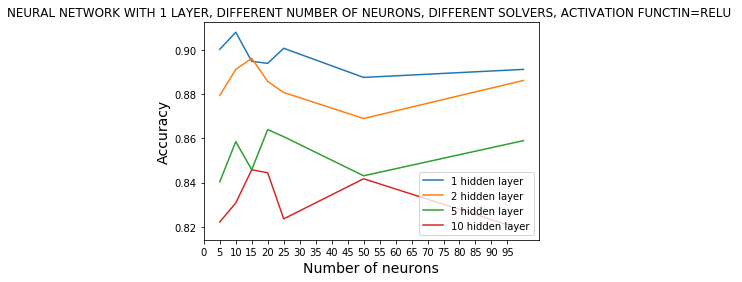

In [29]:
plt.figure(1)   # plot figure
plt.plot(number_neurons_plot,accuracy_nuerons_1_layers,label = '1 hidden layer' )
plt.plot(number_neurons_plot,accuracy_nuerons_2_layers,label = '2 hidden layer' )   
plt.plot(number_neurons_plot,accuracy_nuerons_5_layers,label = '5 hidden layer' )
plt.plot(number_neurons_plot,accuracy_nuerons_10_layers,label = '10 hidden layer' )

plt.ylabel('Accuracy', fontsize = 14)    #function to plot the label in y
plt.xlabel('Number of neurons', fontsize = 14) #function to plot the label in x
plt.title('NEURAL NETWORK WITH 1 LAYER, DIFFERENT NUMBER OF NEURONS, DIFFERENT SOLVERS, ACTIVATION FUNCTIN=RELU ') #this functions shows the legends  
plt.legend() #this functions shows the legends  
plt.xticks(num.arange(0, 100, step=5))

As we can see the figure above, while more number of layers are added to the model, the accuracy does not improve. For this reason, it has been selected 1 hidden layer with 10 neurons, activation function RELU and solver adam.

__c) Repeat each classification method 20 times by varying the split of the training-test set as in question 2-2. Report the average and standard deviation of classification performance on the test set regarding: accuracy, precision, recall, and F- Measure. Also report the training time and classification time of all the methods. Explain why the classification
was repeated 20 times [5].__

__NEURAL NETWORK__

In [30]:
import time
from sklearn.model_selection import StratifiedKFold   #Library k fold cross validation
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import cross_val_score

parameter_cross_validation={"n_splits": [4, 5, 6, 7]  }
parameter_cross_validation_plot=['4', '5', '6', '7']                       #cross validation to use in the model
total_number_cross_validation=len(parameter_cross_validation_plot)         #It is obtained the length of the vector

iterations=20           # number of iterations

accuracy_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
f1_macro_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
precision_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
recall_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations

pointer_cv=0

for parameter_cv in parameter_cross_validation["n_splits"]:    #for loop to evaluate the model with different solvers
    for pointer_iterations in range (0,iterations):    #for loop to evaluate the model with different number of neurons
        cv = StratifiedKFold(n_splits=parameter_cv)
        model_nn = MLPClassifier(hidden_layer_sizes=(10),activation='relu',solver='adam' ) #The neural network function is declared to create the model
        accuracy_vector = cross_val_score(model_nn , features1, target2, cv=cv,scoring='accuracy')  #It is built the model with training data
        accuracy_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        f1_vector = cross_val_score(model_nn , features1, target2, cv=cv,scoring='f1_macro')  #It is built the model with training data
        f1_macro_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        precision_vector = cross_val_score(model_nn , features1, target2, cv=cv,scoring='precision')  #It is built the model with training data
        precision_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        recall_vector = cross_val_score(model_nn , features1, target2, cv=cv,scoring='recall')  #It is built the model with training data
        recall_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
    pointer_cv=pointer_cv+1   
                                 



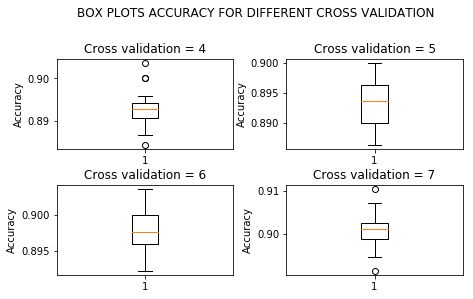

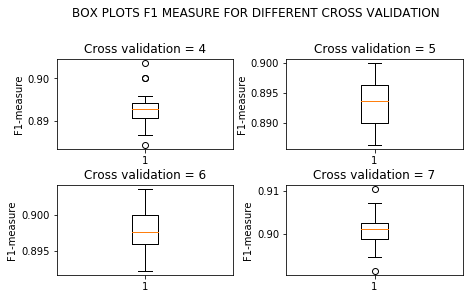

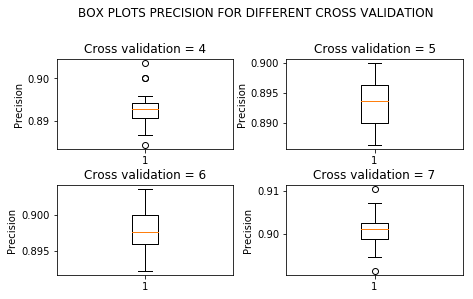

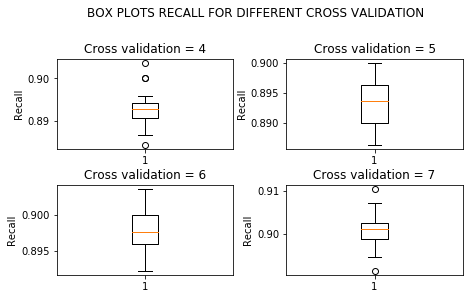

In [31]:
#ACCURACY

fig, ax1 = plt.subplots(2, 2)  # accuracy subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(accuracy_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Accuracy')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS ACCURACY FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#F1 MEASURE
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(f1_macro_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('F1-measure')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS F1 MEASURE FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#PRECISION
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(precision_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Precision')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS PRECISION FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#PRECISION
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(recall_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Recall')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS RECALL FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()


In [32]:
#TRAINING TIME
model_nn = MLPClassifier(hidden_layer_sizes=(10),activation='relu',solver='adam' ) #define a neural network model
start = time.time()                                #it initializes the time 
classifier1 =model_nn.fit(features1, target2)    #it is trained the neural network
end = time.time()                                   #it stops the time 
total_time=end - start
print('TRAINING TIME NEURAL NETWORK = %f [s] '%total_time)             #it is printed the time to train the model
#TESTING TIME
start = time.time()                       #it initializes the time 
one_sample_test=features1.iloc[1,:]       # it is extracted one sample to test the model
one_sample_test=one_sample_test.values    # It is converted from dataframe to numpy
one_sample_test=one_sample_test.reshape(1,-1) # it is reshape the numpy
predict1=model_nn.predict(one_sample_test) #it is predicted the value
end = time.time()                        #it stops the time
total_time=end - start
print('TESTING TIME NEURAL NETWORK =%f [s] '%total_time)   #it is printed the time to test the model

TRAINING TIME NEURAL NETWORK = 0.586437 [s] 
TESTING TIME NEURAL NETWORK =0.000000 [s] 


__RANDOM FOREST__

In [33]:
import time
from sklearn.model_selection import StratifiedKFold   #Library k fold cross validation
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score

parameter_cross_validation={"n_splits": [4, 5, 6, 7]  }
parameter_cross_validation_plot=['4', '5', '6', '7']                       #cross validation to use in the model
total_number_cross_validation=len(parameter_cross_validation_plot)         #It is obtained the length of the vector

iterations=20           # number of iterations

accuracy_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
f1_macro_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
precision_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
recall_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations

pointer_cv=0

for parameter_cv in parameter_cross_validation["n_splits"]:    #for loop to evaluate the model with different solvers
    for pointer_iterations in range (0,iterations):    #for loop to evaluate the model with different number of neurons
        
        cv = StratifiedKFold(n_splits=parameter_cv)
        model_random_forest = RandomForestClassifier(n_estimators=300,max_depth=15,bootstrap=True) #The random forest function is declared to create the model
        accuracy_vector = cross_val_score( model_random_forest, features1, target2, cv=cv,scoring='accuracy')  #It is built the model with training data
        accuracy_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        f1_vector = cross_val_score(model_random_forest , features1, target2, cv=cv,scoring='f1_macro')  #It is built the model with training data
        f1_macro_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        precision_vector = cross_val_score(model_random_forest , features1, target2, cv=cv,scoring='precision')  #It is built the model with training data
        precision_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        recall_vector = cross_val_score(model_random_forest , features1, target2, cv=cv,scoring='recall')  #It is built the model with training data
        recall_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
    pointer_cv=pointer_cv+1   
    

  

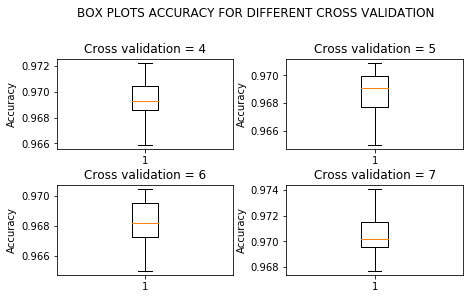

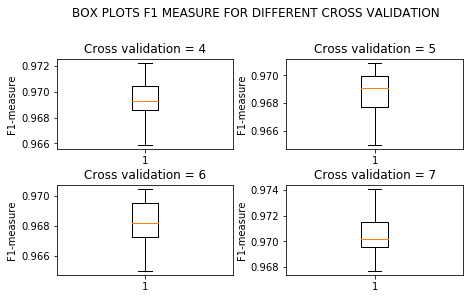

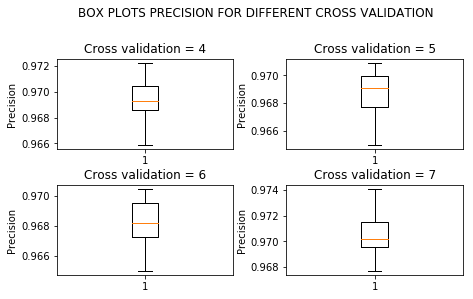

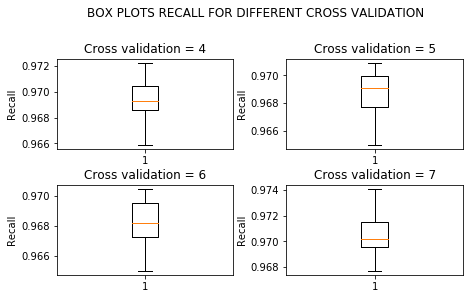

In [34]:
#ACCURACY

fig, ax1 = plt.subplots(2, 2)  # accuracy subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(accuracy_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Accuracy')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS ACCURACY FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#F1 MEASURE
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(f1_macro_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('F1-measure')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS F1 MEASURE FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#PRECISION
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(precision_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Precision')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS PRECISION FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#PRECISION
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(recall_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Recall')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS RECALL FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

In [35]:
#TRAINING TIME
model_random_forest = RandomForestClassifier(n_estimators=300,max_depth=15,bootstrap=True) #The random forest function is declared to create the model
start = time.time()                                #it initializes the time 
classifier1 =model_random_forest.fit(features1, target2)    #it is trained the neural network
end = time.time()                                   #it stops the time 
total_time=end - start
print('TRAINING TIME RANDOM FOREST = %f [s] '%total_time)             #it is printed the time to train the model
#TESTING TIME
start = time.time()                       #it initializes the time 
one_sample_test=features1.iloc[1,:]       # it is extracted one sample to test the model
one_sample_test=one_sample_test.values    # It is converted from dataframe to numpy
one_sample_test=one_sample_test.reshape(1,-1) # it is reshape the numpy
predict1=model_random_forest.predict(one_sample_test) #it is predicted the value
end = time.time()                        #it stops the time
total_time=end - start
print('TESTING TIME RANDOM FOREST  =%f [s] '%total_time)   #it is printed the time to test the model

TRAINING TIME RANDOM FOREST = 0.562384 [s] 
TESTING TIME RANDOM FOREST  =0.015602 [s] 


__SVM__

In [37]:
from sklearn.model_selection import StratifiedKFold   #Library k fold cross validation
from sklearn import svm    #import svm
import numpy as np
from sklearn.model_selection import cross_val_score

parameter_cross_validation={"n_splits": [4, 5, 6, 7]  }
parameter_cross_validation_plot=['4', '5', '6', '7']                       #cross validation to use in the model
total_number_cross_validation=len(parameter_cross_validation_plot)         #It is obtained the length of the vector

iterations=20           # number of iterations

accuracy_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
f1_macro_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
precision_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
recall_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations

pointer_cv=0

for parameter_cv in parameter_cross_validation["n_splits"]:    #for loop to evaluate the model with different solvers
    for pointer_iterations in range (0,iterations):    #for loop to evaluate the model with different number of neurons
        start = time.time()
        cv = StratifiedKFold(n_splits=parameter_cv)
        rbf_svc = svm.SVC(kernel='rbf',C=5, gamma=0.01) #Best model selected #The random forest function is declared to create the model
        accuracy_vector = cross_val_score(rbf_svc , features1, target2, cv=cv,scoring='accuracy')  #It is built the model with training data
        accuracy_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        f1_vector = cross_val_score(rbf_svc , features1, target2, cv=cv,scoring='f1_macro')  #It is built the model with training data
        f1_macro_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        precision_vector = cross_val_score(rbf_svc , features1, target2, cv=cv,scoring='precision')  #It is built the model with training data
        precision_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        recall_vector = cross_val_score(rbf_svc , features1, target2, cv=cv,scoring='recall')  #It is built the model with training data
        recall_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        end = time.time()
    pointer_cv=pointer_cv+1  
    


TRAINING TIME = %f 4.254799842834473


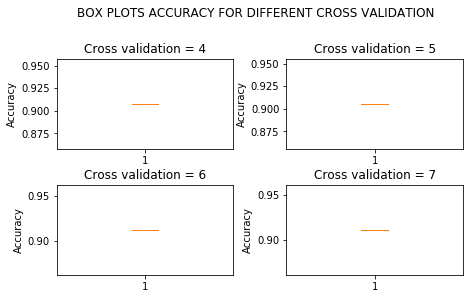

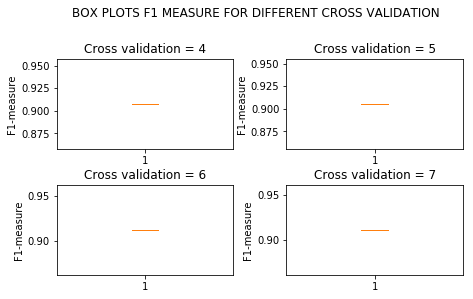

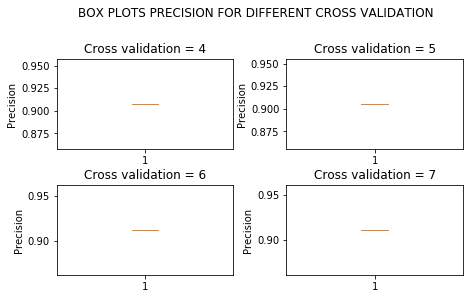

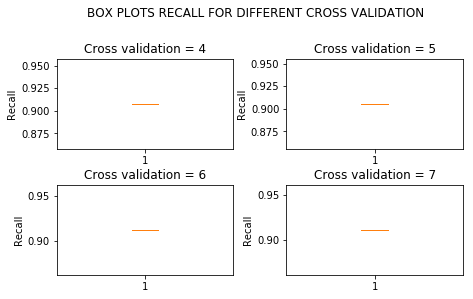

In [38]:
#ACCURACY

fig, ax1 = plt.subplots(2, 2)  # accuracy subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(accuracy_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Accuracy')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS ACCURACY FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#F1 MEASURE
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(f1_macro_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('F1-measure')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS F1 MEASURE FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#PRECISION
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(precision_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Precision')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS PRECISION FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#PRECISION
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(recall_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Recall')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS RECALL FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

In [39]:
#TRAINING TIME
rbf_svc = svm.SVC(kernel='rbf',C=5, gamma=0.01) #Best model selected #The random forest function is declared to create the model
start = time.time()                                #it initializes the time 
classifier1 =rbf_svc.fit(features1, target2)    #it is trained the neural network
end = time.time()                                   #it stops the time 
total_time=end - start
print('TRAINING TIME SVM RADIAL = %f [s] '%total_time)             #it is printed the time to train the model
#TESTING TIME
start = time.time()                       #it initializes the time 
one_sample_test=features1.iloc[1,:]       # it is extracted one sample to test the model
one_sample_test=one_sample_test.values    # It is converted from dataframe to numpy
one_sample_test=one_sample_test.reshape(1,-1) # it is reshape the numpy
predict1=rbf_svc.predict(one_sample_test) #it is predicted the value
end = time.time()                        #it stops the time
total_time=end - start
print('TESTING TIME SVM RADIAL  =%f [s] '%total_time)   #it is printed the time to test the model

TRAINING TIME SVM RADIAL = 0.205711 [s] 
TESTING TIME SVM RADIAL  =0.000000 [s] 


__KNN__

In [43]:
from sklearn.model_selection import StratifiedKFold   #Library k fold cross validation
from sklearn import svm    #import svm
import numpy as np
from sklearn.model_selection import cross_val_score

parameter_cross_validation={"n_splits": [4, 5, 6, 7]  }
parameter_cross_validation_plot=['4', '5', '6', '7']                       #cross validation to use in the model
total_number_cross_validation=len(parameter_cross_validation_plot)         #It is obtained the length of the vector

iterations=20           # number of iterations

accuracy_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
f1_macro_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
precision_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations
recall_cv_iterations= np.zeros((total_number_cross_validation,iterations))  #It is created an array of 2 dimensions to store the metric for different cv and a number of iterations

pointer_cv=0

for parameter_cv in parameter_cross_validation["n_splits"]:    #for loop to evaluate the model with different solvers
    for pointer_iterations in range (0,iterations):    #for loop to evaluate the model with different number of neurons
        
        cv = StratifiedKFold(n_splits=parameter_cv)
        model_knn_2 =  KNeighborsClassifier(n_neighbors=10)  #The knn is declared to create the model
        accuracy_vector = cross_val_score(model_knn_2  , features1, target2, cv=cv,scoring='accuracy')  #It is built the model with training data
        accuracy_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        f1_vector = cross_val_score(model_knn_2  , features1, target2, cv=cv,scoring='f1_macro')  #It is built the model with training data
        f1_macro_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        precision_vector = cross_val_score(model_knn_2 , features1, target2, cv=cv,scoring='precision')  #It is built the model with training data
        precision_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
        recall_vector = cross_val_score(model_knn_2 , features1, target2, cv=cv,scoring='recall')  #It is built the model with training data
        recall_cv_iterations[pointer_cv][pointer_iterations]=accuracy_vector.mean()
        
    pointer_cv=pointer_cv+1  


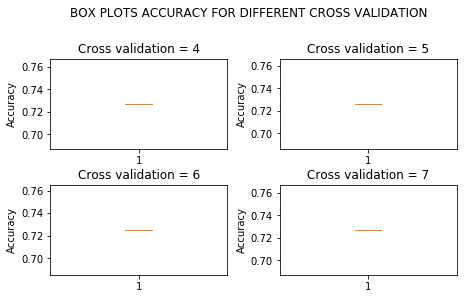

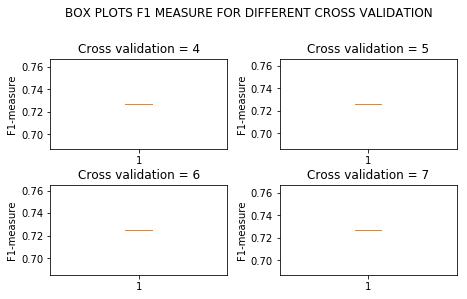

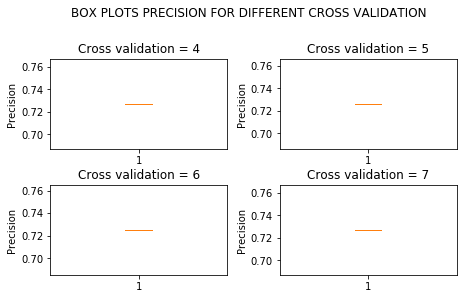

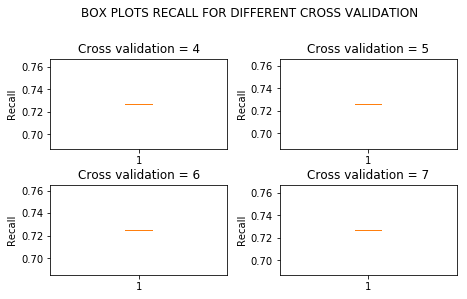

In [44]:
#ACCURACY

fig, ax1 = plt.subplots(2, 2)  # accuracy subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(accuracy_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Accuracy')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS ACCURACY FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#F1 MEASURE
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(f1_macro_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('F1-measure')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS F1 MEASURE FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#PRECISION
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(precision_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Precision')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS PRECISION FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

#PRECISION
fig, ax1 = plt.subplots(2, 2)  # f1 measure subplot
i=0    #index to subplots
for plot_cv1 in range(0,2):     #for loop to plot box plot 
    for plot_cv2 in range(0,2):  #for loop to plot box plot 
        ax1[plot_cv1,plot_cv2].boxplot(recall_cv_iterations[i,:]) #plot a boxplot
        ax1[plot_cv1,plot_cv2].set_title('Cross validation = %s'%parameter_cross_validation_plot[i]) # plot title
        ax1[plot_cv1][plot_cv2].set_ylabel('Recall')
        i=i+1 #index to plot different graphs
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.05, top=0.8,
                    hspace=0.4, wspace=0.3)      
fig.suptitle('BOX PLOTS RECALL FOR DIFFERENT CROSS VALIDATION') # or plt.suptitle('Main title')
plt.show()

In [45]:
#TRAINING TIME
model_knn_2 =  KNeighborsClassifier(n_neighbors=10)  #The knn is declared to create the model
start = time.time()                                #it initializes the time 
classifier1 =model_knn_2.fit(features1, target2)    #it is trained the neural network
end = time.time()                                   #it stops the time 
total_time=end - start
print('TRAINING TIME KNN = %f [s] '%total_time)             #it is printed the time to train the model
#TESTING TIME
start = time.time()                       #it initializes the time 
one_sample_test=features1.iloc[1,:]       # it is extracted one sample to test the model
one_sample_test=one_sample_test.values    # It is converted from dataframe to numpy
one_sample_test=one_sample_test.reshape(1,-1) # it is reshape the numpy
predict1=model_knn_2.predict(one_sample_test) #it is predicted the value
end = time.time()                        #it stops the time
total_time=end - start
print('TESTING TIME KNN  =%f [s] '%total_time)   #it is printed the time to test the model

TRAINING TIME KNN = 0.015626 [s] 
TESTING TIME KNN  =0.000000 [s] 


__Explain why the classification was repeated 20 times__

The classification is repeated 20 times due to the fact that a random seed changed in each iteration. For this reason, it is repeated the classification 20 times to obtain the mean and variance for each performance metric. 

__4. Comment on the obtained results, what are the benefits and weaknesses of each method on this dataset. How could this analysis help to make the choice of the right method to use for a dataset of this type in the future? [5]__

As we can see in the box plot above, the best classifier for the dataset is random forest using 300 estimators and depth of the tree=15. The accuracy reached is almost 96% with variance 0. However, the time to train and test is higher than other classifiers such as KNN and SVM. This classifier is robust classifier because it uses the concept of purity to find the best model considering gini, or mutual information. Due to the fact that many trees are created and the final decision is taken using voting. It performs better that decision trees. 
The second best classifier is SVM. It reaches 91% of accuracy, and the time to train and test is half of the time if we compare with random forest. This classifier is backed up by a robust mathematical theory. SVM can be considered a powerful classifier due to the fact that it accomplish repeatability because if it is trained the classifier with the same hyper-parameters, it will be obtained the same result always. In the present work, it has been used SVM classifier with radial basis function which uses the kernel trick to find the best model.
The third classifier is neural network. Generally, neural network classifier can be considered a black box because it is difficult to understand mathematically how does it work. This classifier can reach different local minima depending of the initialization of the weigths. For this reason, it can be considered not trustworthy. In addition, the time to train and predict takes more time than other classifiers.
Finally, KNN shows the lowest performance. This classifier can be affected by umbalaced dataset. Generally this classifier is not so robust because the decision depends of the neighbors around. It can be fast to take a decision, but it is not accurate.


__5. If you had to remove 1 features from the dataset, which feature would you select to remove from the dataset and why? What would have happened if you did classification on two dimensions only? [5]__

To apply feature selection to the dataset, it has been used a decision tree classifier which uses gini to rank each feature according to the purity of it. In the following lines of code is applied decision tree to rank the features for DNA dataset.

In [36]:
from sklearn.tree import DecisionTreeClassifier  # library to define decision tree classifier
decision_tree_evaluation = DecisionTreeClassifier(random_state=0)     # it is defined the model
print(decision_tree_evaluation)
decision_tree_evaluation.fit(features1_dr, target2)    #it is fit the model
feature_selection=pd.Series(decision_tree_evaluation.feature_importances_) # function to rank features
feature_selection.sort_values()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


30    0.002212
10    0.004808
46    0.006304
27    0.007676
42    0.009219
40    0.010171
47    0.010738
22    0.010815
9     0.010989
33    0.011459
38    0.011460
4     0.011826
5     0.012013
16    0.012079
49    0.012844
45    0.013431
56    0.013722
28    0.013782
32    0.013845
0     0.015079
48    0.015112
51    0.015338
1     0.016173
19    0.016249
54    0.016355
53    0.016745
43    0.017319
2     0.017440
50    0.017959
23    0.017971
31    0.018030
21    0.018372
34    0.018871
25    0.019156
17    0.019227
26    0.019252
13    0.019635
37    0.020019
7     0.020024
55    0.020204
3     0.020399
20    0.020817
29    0.020819
39    0.020934
24    0.021491
44    0.021941
18    0.022142
36    0.022911
6     0.024152
41    0.024803
12    0.025329
15    0.025434
14    0.027183
52    0.028041
8     0.028971
11    0.032732
35    0.037976
dtype: float64

Considering the analysis using decision trees, the feature that we have to eliminate is the feature 30 because it is the last in the ranking.

__What would have happened if you did classification on two dimensions only?__

If we select the most important features using decision tree, we have to select feature 35 and 11. In the next lines of code is analyzed the performance of svm classifier using only two features

In [42]:
#TRAINING TIME
rbf_svc = svm.SVC(kernel='rbf',C=5, gamma=0.01) #Best model selected #The random forest function is declared to create the model
featuresp=features1_dr.iloc[:,num.r_[35,11]]   #it is selected only the 2 features
accuracy = cross_val_score(rbf_svc , featuresp, target2, cv=5,scoring='accuracy')  #It is built the model with training data
print(accuracy.mean())

0.5179365314152167


As we can see the accuracy decreases in almost %44. For this reason, it is important to do feature selection until the accuracy of the model is not affected.